<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data">Breast Cancer Wisconsin (Diagnostic)</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer_logo.png" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer.png" width="512">
</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'>Les variables sont calculées à partir d'une image numérisée d'une ponction d'aspiration à l'aiguille fine (FNA) utilisée pour obtenir des échantillons à partir de ganglions lymphatique. Elles décrivent les caractéristiques des noyaux cellulaires présents sur l'image.</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [29]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [31]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

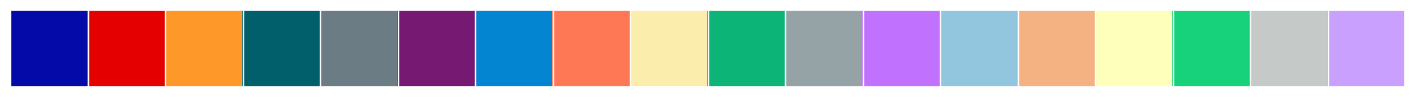

In [32]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [33]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee, afficheSeparationsBinaires

In [34]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram,\
                         affichageDistribution,afficheColonneCible, add_median_labels, formatPct

In [35]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [36]:
projet = initProjet(repertoireRacine='.',nomProjet='BreastCancerWisconsin-Classifications')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>



In [37]:
import numpy as np
print(f"""
Petits pains demain x{np.random.randint(15,100)}
""")


Petits pains demain x50



In [38]:
donnees = pd.read_csv('../donnees/Cervical Cancer Risk/kag_risk_factors_cervical_cancer.csv', na_values='?')
donnees.columns = list(map(lambda x: str(x).replace(':',' '),donnees.columns))
# Pour les valeurs qualitative 
#dictDxCancer,dictDxCIN,dicDxHPV = {'M':1,'B':0},{1:'M',0:'B'},{1:'malignant',0:'benign'}
cible = 'Dx Cancer'
donnees.sample(5)

Age  Number of sexual partners  First sexual intercourse  \
94    33                        3.0                      16.0   
220   25                        NaN                      18.0   
492   34                        1.0                      26.0   
90    36                        1.0                      13.0   
850   19                        1.0                      14.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
94                  2.0     0.0             0.0                  0.0   
220                 2.0     0.0             0.0                  0.0   
492                 3.0     0.0             0.0                  0.0   
90                  6.0     0.0             0.0                  0.0   
850                 0.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
94                       0.0                              0.0  0.0  ...   
220                      NaN                              NaN  NaN  ...   
492                      1.0                              2.0  0.0  ...   
90                       NaN                              NaN  NaN  ...   
850                      0.0                              0.0  0.0  ...   

     STDs  Time since first diagnosis  STDs  Time since last diagnosis  \
94                                NaN                              NaN   
220                               NaN                              NaN   
492                               NaN                              NaN   
90                                NaN                              NaN   
850                               NaN                              NaN   

     Dx Cancer  Dx CIN  Dx HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  
94           0       0       0   0           0         0         0       0  
220          0       0       0   0           0         0         0       0  
492          0       0       0   0           0         0         0       0  
90           0       0       0   0           0         0         0       0  
850          0       0       0   0           0         0         0       0  

[5 rows x 36 columns]

In [39]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [40]:
donnees.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs condylomatosis',
       'STDs cervical condylomatosis', 'STDs vaginal condylomatosis',
       'STDs vulvo-perineal condylomatosis', 'STDs syphilis',
       'STDs pelvic inflammatory disease', 'STDs genital herpes',
       'STDs molluscum contagiosum', 'STDs AIDS', 'STDs HIV',
       'STDs Hepatitis B', 'STDs HPV', 'STDs  Number of diagnosis',
       'STDs  Time since first diagnosis', 'STDs  Time since last diagnosis',
       'Dx Cancer', 'Dx CIN', 'Dx HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

>> <div style='padding:15px;color:#030aa7;background-color:#d8dcd6;font-size:120%;text-align: left;font-family: Georgia, serif'>Suppression des valeur non enregistré</div>

In [41]:
print("### Basic Statistics ###")
print("\nMissing Values:")
print(donnees.isnull().sum().sort_values(ascending=False))

### Basic Statistics ###

Missing Values:
STDs  Time since last diagnosis       787
STDs  Time since first diagnosis      787
IUD                                   117
IUD (years)                           117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs pelvic inflammatory disease      105
STDs vulvo-perineal condylomatosis    105
STDs HPV                              105
STDs Hepatitis B                      105
STDs HIV                              105
STDs AIDS                             105
STDs molluscum contagiosum            105
STDs genital herpes                   105
STDs syphilis                         105
STDs vaginal condylomatosis           105
STDs cervical condylomatosis          105
STDs condylomatosis                   105
STDs (number)                         105
STDs                                  105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (packs/year)               

In [42]:
print("\nBasic Statistics:")
print(donnees.describe())


Basic Statistics:
              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
mi

In [43]:
for col in donnees.columns:
    print(f"\n{col} : {donnees[col].sort_values().unique()}")


Age : [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 59 70 79 84]

Number of sexual partners : [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 15. 28. nan]

First sexual intercourse : [10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 32. nan]

Num of pregnancies : [ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. nan]

Smokes : [ 0.  1. nan]

Smokes (years) : [ 0.          0.16        0.5         1.          1.26697291  2.
  3.          4.          5.          6.          7.          8.
  9.         10.         11.         12.         13.         14.
 15.         16.         18.         19.         20.         21.
 22.         24.         28.         32.         34.         37.
         nan]

Smokes (packs/year) : [0.00000000e+00 1.00000000e-03 3.00000000e-03 2.50000000e-02
 4.00000000e-02 5.00000000e-02 1.00000000e-01 1.50000000e-01
 1.60000000e-01 2.00000000e-01 2.50000000e-01 3.00000000e-

In [44]:
donnees[donnees['Hormonal Contraceptives'].isna()][donnees['Hormonal Contraceptives (years)'].isna()]

Age  Number of sexual partners  First sexual intercourse  \
71    34                        NaN                       NaN   
74    35                        2.0                      17.0   
90    36                        1.0                      13.0   
95    31                        4.0                      16.0   
98    31                        1.0                      20.0   
..   ...                        ...                       ...   
783   18                        1.0                      18.0   
785   28                        1.0                      19.0   
792   23                        3.0                      15.0   
794   20                        2.0                      16.0   
819   14                        1.0                      14.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
71                  3.0     0.0             0.0                 0.00   
74                  2.0     1.0            15.0                 0.32   
90                  6.0     0.0             0.0                 0.00   
95                  2.0     0.0             0.0                 0.00   
98                  5.0     0.0             0.0                 0.00   
..                  ...     ...             ...                  ...   
783                 1.0     0.0             0.0                 0.00   
785                 2.0     0.0             0.0                 0.00   
792                 1.0     1.0             5.0                 0.75   
794                 1.0     0.0             0.0                 0.00   
819                 NaN     0.0             0.0                 0.00   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
71                       NaN                              NaN  NaN  ...   
74                       NaN                              NaN  NaN  ...   
90                       NaN                              NaN  NaN  ...   
95                       NaN                              NaN  NaN  ...   
98                       NaN                              NaN  NaN  ...   
..                       ...                              ...  ...  ...   
783                      NaN                              NaN  NaN  ...   
785                      NaN                              NaN  NaN  ...   
792                      NaN                              NaN  NaN  ...   
794                      NaN                              NaN  NaN  ...   
819                      NaN                              NaN  0.0  ...   

     STDs  Time since first diagnosis  STDs  Time since last diagnosis  \
71                                NaN                              NaN   
74                                NaN                              NaN   
90                                NaN                              NaN   
95                                NaN                              NaN   
98                                NaN                              NaN   
..                                ...                              ...   
783                               NaN                              NaN   
785                               NaN                              NaN   
792                               NaN                              NaN   
794                               NaN                              NaN   
819                               NaN                              NaN   

     Dx Cancer  Dx CIN  Dx HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  
71           0       0       0   0           0         0         0       0  
74           0       0       0   0           0         0         0       0  
90           0       0       0   0           0         0         0       0  
95           0       0       0   0           0         0         0       0  
98           0       0       0   0           0         0         0       0  
..         ...     ...     ...  ..         ...       ...       ...     ...  
783          0       0       0

### Suppression des donnes manquantes

In [45]:
donnees.fillna(0,inplace=True)
donnees.drop(columns=['STDs  Time since last diagnosis','STDs  Time since first diagnosis'],inplace=True)

In [46]:
print("### Basic Statistics ###")
print("\nMissing Values:")
print(donnees.isnull().sum().sort_values(ascending=False))

### Basic Statistics ###

Missing Values:
Age                                   0
STDs  Number of diagnosis             0
STDs genital herpes                   0
STDs molluscum contagiosum            0
STDs AIDS                             0
STDs HIV                              0
STDs Hepatitis B                      0
STDs HPV                              0
Dx Cancer                             0
Number of sexual partners             0
Dx CIN                                0
Dx HPV                                0
Dx                                    0
Hinselmann                            0
Schiller                              0
Citology                              0
STDs pelvic inflammatory disease      0
STDs syphilis                         0
STDs vulvo-perineal condylomatosis    0
STDs vaginal condylomatosis           0
STDs cervical condylomatosis          0
STDs condylomatosis                   0
STDs (number)                         0
STDs                                  

## Gestion des valeurs "qualitative"

In [47]:
variableQualitatives = list(donnees.drop(columns=['Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)', cible]).columns)

In [60]:
for col in variableQualitatives:
    print(f"\n{col} : {donnees[col].sort_values(ascending=False).unique()}")


Age : [84 79 70 59 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33
 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13]

Number of sexual partners : [28. 15. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

First sexual intercourse : [32. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13.
 12. 11. 10.  0.]

Num of pregnancies : [11. 10.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Smokes : [1. 0.]

Hormonal Contraceptives : [1. 0.]

IUD : [1. 0.]

STDs : [1. 0.]

STDs (number) : [4. 3. 2. 1. 0.]

STDs condylomatosis : [1. 0.]

STDs cervical condylomatosis : [0.]

STDs vaginal condylomatosis : [1. 0.]

STDs vulvo-perineal condylomatosis : [1. 0.]

STDs syphilis : [1. 0.]

STDs pelvic inflammatory disease : [1. 0.]

STDs genital herpes : [1. 0.]

STDs molluscum contagiosum : [1. 0.]

STDs AIDS : [0.]

STDs HIV : [1. 0.]

STDs Hepatitis B : [1. 0.]

STDs HPV : [1. 0.]

STDs  Number of diagnosis : [3 2 1 0]

Dx CIN : [1 0]

Dx HPV : [1 0]

Dx : [1 0]

Hinselman

In [68]:
df_dummies = pd.get_dummies(donnees, columns=variableQualitatives, drop_first=True)

In [69]:
donnees.sample(5)

index  Age  Number of sexual partners  \
échantillon   Dx Cancer                                          
apprentissage 0            136   31                        2.0   
test          0            457   15                        3.0   
apprentissage 0            683   39                        2.0   
              0            430   19                        4.0   
              0            179   30                        1.0   

                         First sexual intercourse  Num of pregnancies  Smokes  \
échantillon   Dx Cancer                                                         
apprentissage 0                              18.0                 3.0     0.0   
test          0                              14.0                 1.0     1.0   
apprentissage 0                              18.0                 3.0     0.0   
              0                              15.0                 1.0     0.0   
              0                              16.0                 2.0     0.0   

                         Smokes (years)  Smokes (packs/year)  \
échantillon   Dx Cancer                                        
apprentissage 0                0.000000             0.000000   
test          0                1.266973             0.513202   
apprentissage 0                0.000000             0.000000   
              0                0.000000             0.000000   
              0                0.000000             0.000000   

                         Hormonal Contraceptives  \
échantillon   Dx Cancer                            
apprentissage 0                              0.0   
test          0                              0.0   
apprentissage 0                              1.0   
              0                              1.0   
              0                              1.0   

                         Hormonal Contraceptives (years)  ...  Dx_1  Dx_0  \
échantillon   Dx Cancer                                   ...               
apprentissage 0                                     0.00  ...     0     1   
test          0                                     0.00  ...     0     1   
apprentissage 0                                     3.00  ...     0     1   
              0                                     0.42  ...     0     1   
              0                                     9.00  ...     0     1   

                         Hinselmann_1  Hinselmann_0  Schiller_1  Schiller_0  \
échantillon   Dx Cancer                                                       
apprentissage 0                     0             1           0           1   
test          0                     0             1           0           1   
apprentissage 0                     0             1           0           1   
              0                     0             1           0           1   
              0                     0             1           0           1   

                         Citology_1  Citology_0  Biopsy_1  Biopsy_0  
échantillon   Dx Cancer                                              
apprentissage 0                   0           1         0         1  
test          0                   1           0         0         1  
apprentissage 0                   0           1         0         1  
              0                   0           1         0         1  
              0                   0           1         0         1  

[5 rows x 177 columns]

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

In [49]:
X = donnees.copy()
y = donnees.reset_index()[cible]
y.index = X.index

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 
donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'test'
donnees.reset_index(inplace=True)
donnees.set_index(['échantillon', cible],inplace=True)
donnees.to_parquet(os.path.join(projet.repertoireDonnees,'donnees_echantillons.parquet'))

In [51]:
X = donnees.copy()
y = donnees.reset_index()[cible]
y.index = X.index

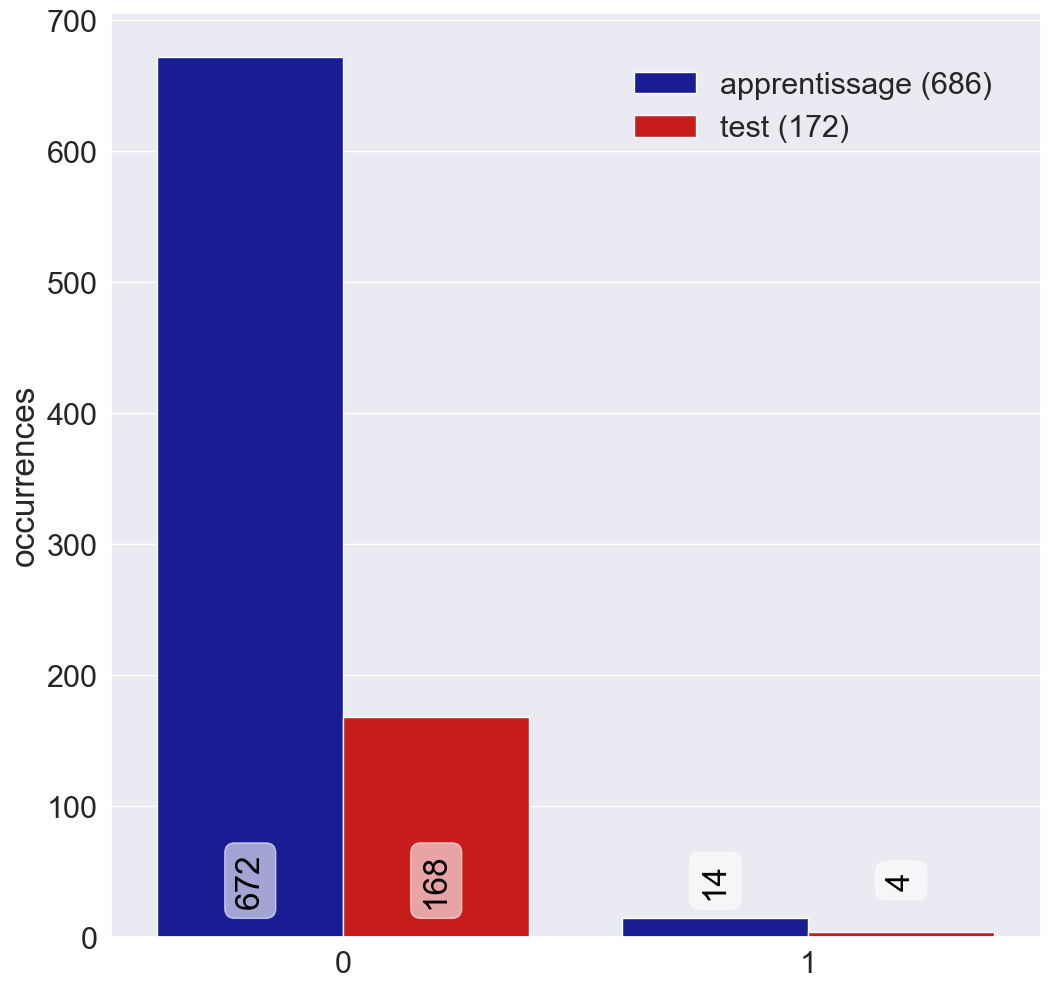

In [52]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
afficheSeparationsBinaires(donnees, palette, ax, cible=cible)

In [53]:
X_train, X_test, y_train, y_test = X.loc[('apprentissage'),:],\
                                   X.loc[('test'),:],\
                                   y.loc[('apprentissage')],\
                                   y.loc[('test')] 

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Déclaration des classificateurs </div></b>

In [54]:
classificateursDict =  initDictionnaireClassificateurs(arbres=12)
classificateursDict.pop('LightGBM')
classificateursDict.pop('XGBoost')
classificateursDict.pop('Poly_NuSVM')
classificateursDict.pop('Radial_NuSVM')
# classificateursDict.pop('Stochastic_GD')

NuSVC(gamma=0.5, nu=0.195, probability=True)

In [55]:
classificateursDict

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=12, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=12),
 'LogisticRegression': LogisticRegression(C=0.81113, max_iter=3000, n_jobs=-1),
 'Stochastic_GD': SGDClassifier(alpha=0.01, loss='log_loss', max_iter=200),
 'Gaussian_Process': GaussianProcessClassifier(n_jobs=-1),
 'Nearest_Neighbors': KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=17, p=1,
                      weights='distance'),
 'Linear_SVM': SVC(C=10, kernel='linear', probability=True),
 'GaussianNaiveBayes': GaussianNB(),
 'QuadraticDiscriminant': QuadraticDiscriminantAnalysis(),
 'Neural_Net': MLPClassifier(alpha=1)}

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Essai initial avec les donnes sans aucun traitement</div></b> 

AdaBoost               0.9884	--	Area under the ROC curve : 0.9784	--	Exécution  :.03s
GaussianNaiveBayes     0.8256	--	Area under the ROC curve : 0.9970	--	Exécution  :.01s
Gaussian_Process       0.9709	--	Area under the ROC curve : 0.7009	--	Exécution  :.10s
Linear_SVM             0.9884	--	Area under the ROC curve : 0.9970	--	Exécution  :.77s
LogisticRegression     0.9884	--	Area under the ROC curve : 1.0000	--	Exécution  :1.42s
Nearest_Neighbors      0.9767	--	Area under the ROC curve : 0.6101	--	Exécution  :.08s
Neural_Net             0.9767	--	Area under the ROC curve : 0.8065	--	Exécution  :.12s
QuadraticDiscriminant  0.9767	--	Area under the ROC curve : 0.5000	--	Exécution  :.02s
Random_Forest          0.9826	--	Area under the ROC curve : 1.0000	--	Exécution  :.10s
Stochastic_GD          0.9767	--	Area under the ROC curve : 0.4048	--	Exécution  :.02s


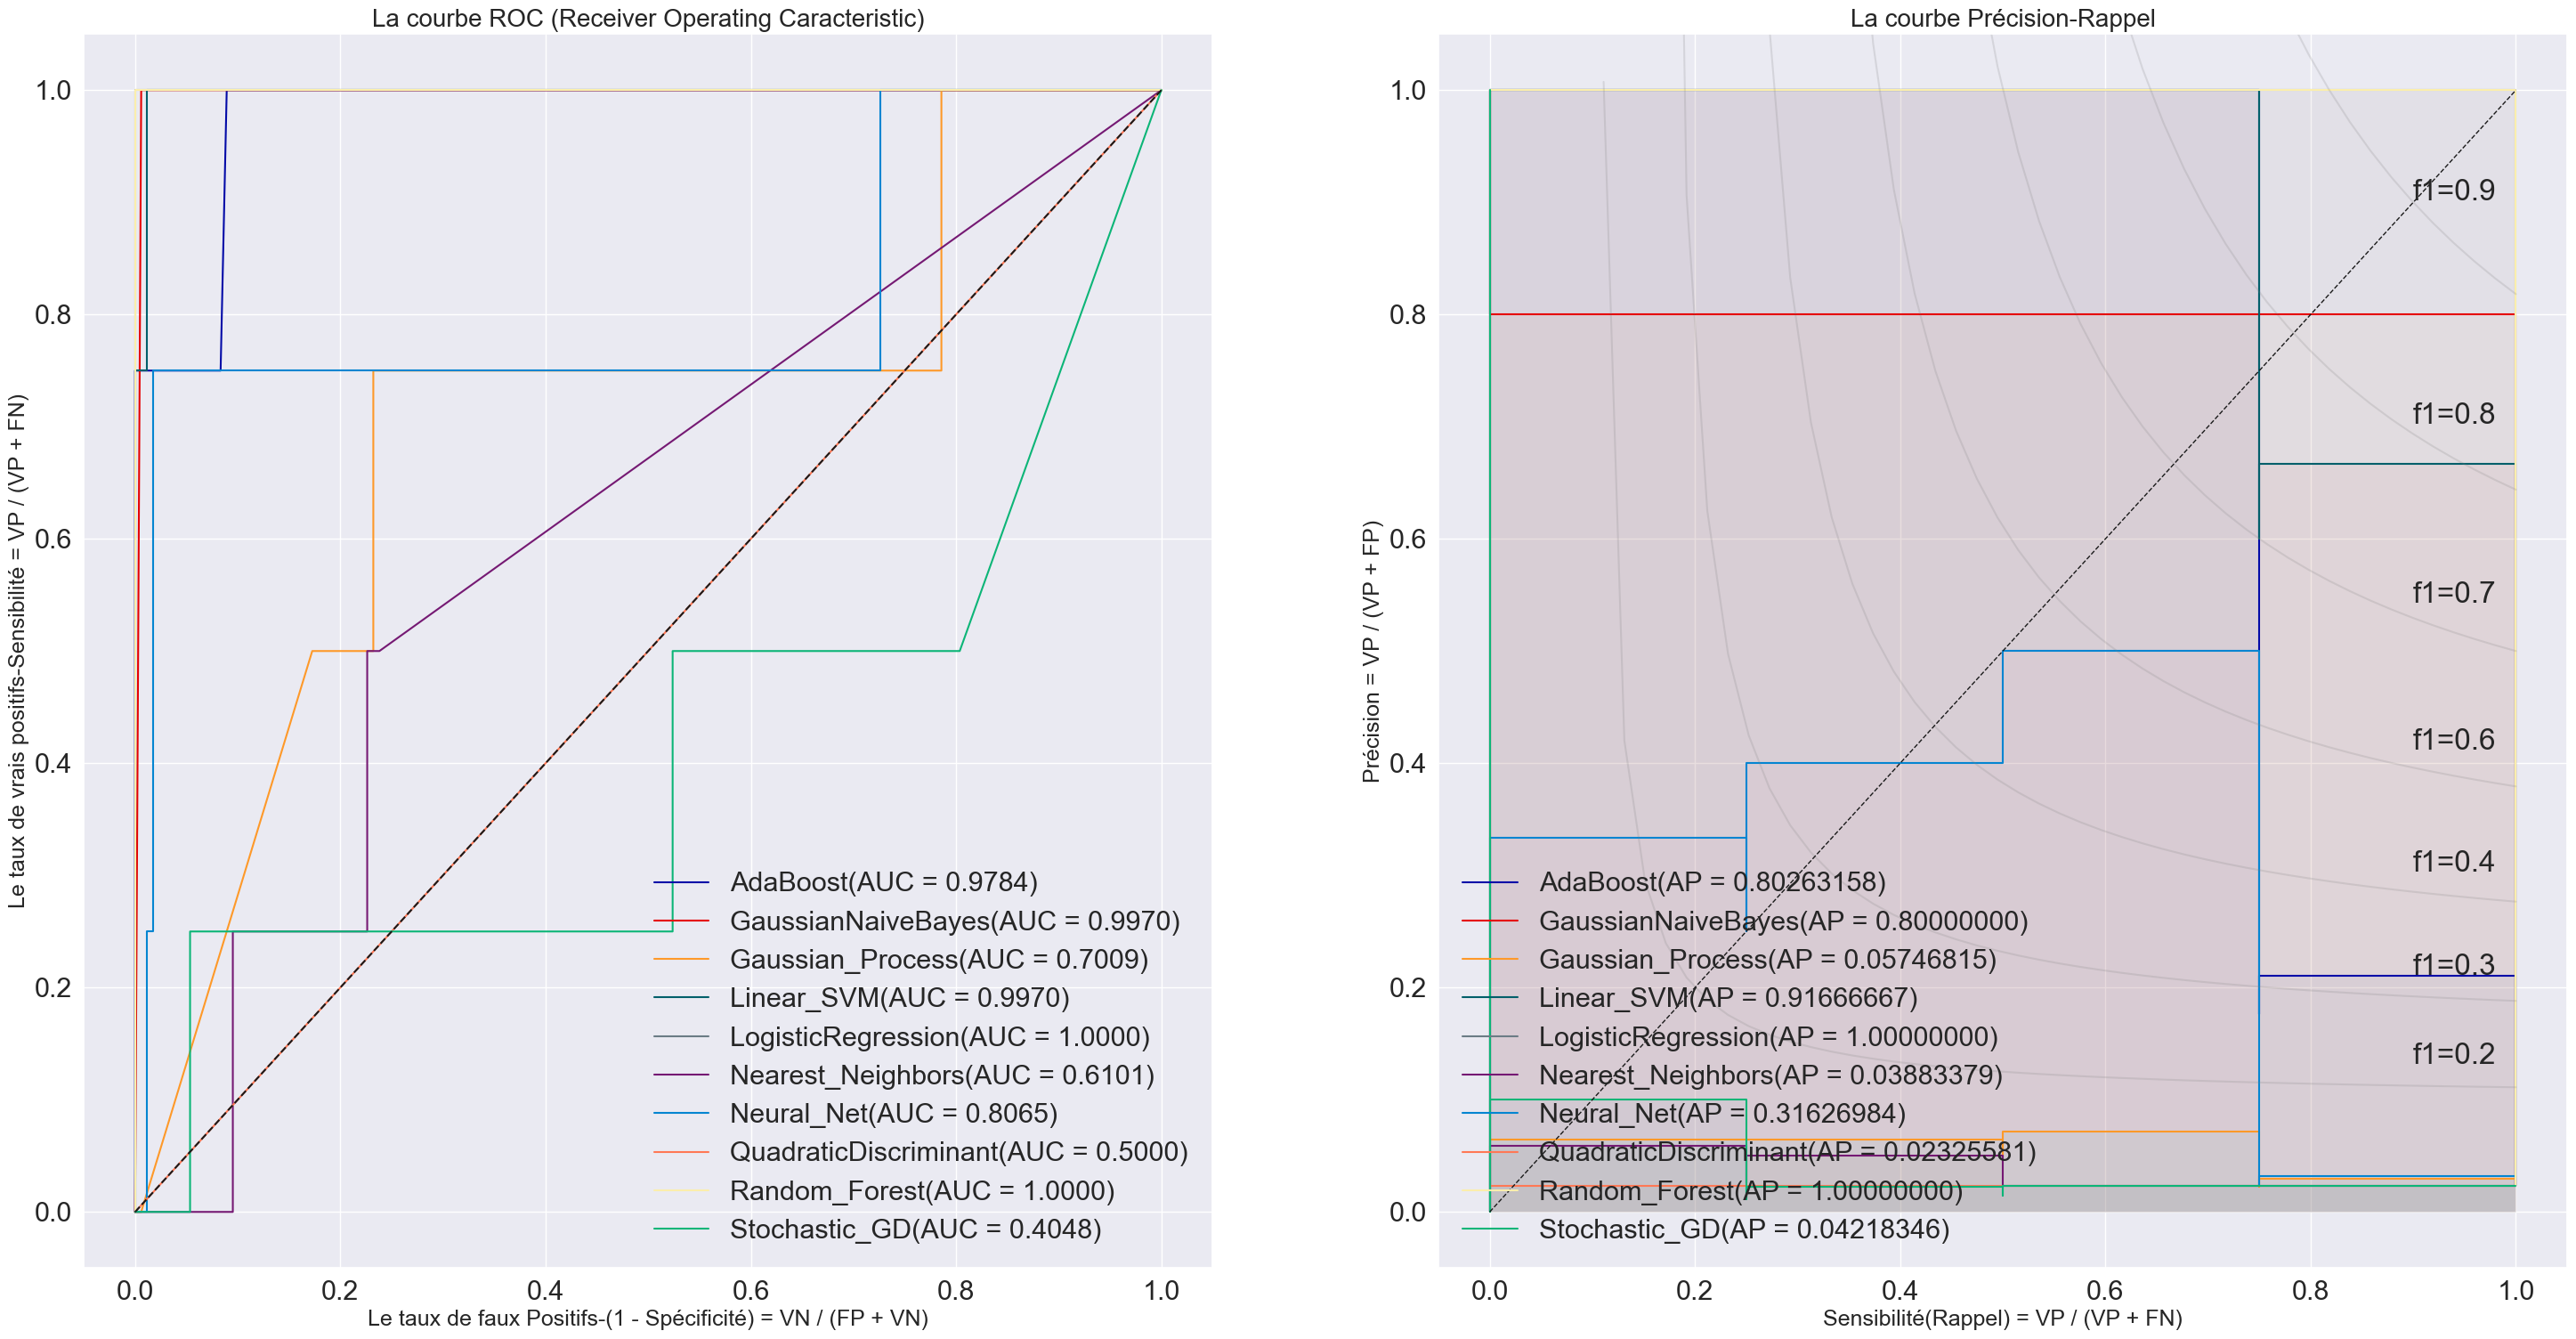

Exécution  :3.59s


In [56]:
resultats = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette[:len(classificateursDict.keys())],
                                                     nom_essai = 'Initial', 
                                                     projet=projet)

In [57]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('aucROC',ascending=False).head(16)

aucROC  avgPrecRec  accuracy        f1  precision  \
Classifieur                                                                  
LogisticRegression     1.000000    1.000000  0.988372  0.666667   1.000000   
Random_Forest          1.000000    1.000000  0.982558  0.400000   1.000000   
Linear_SVM             0.997024    0.916667  0.988372  0.666667   1.000000   
GaussianNaiveBayes     0.997024    0.800000  0.825581  0.210526   0.117647   
AdaBoost               0.978423    0.802632  0.988372  0.666667   1.000000   
Neural_Net             0.806548    0.316270  0.976744  0.000000   0.000000   
Gaussian_Process       0.700893    0.057468  0.970930  0.000000   0.000000   
Nearest_Neighbors      0.610119    0.038834  0.976744  0.000000   0.000000   
QuadraticDiscriminant  0.500000    0.023256  0.976744  0.000000   0.000000   
Stochastic_GD          0.404762    0.042183  0.976744  0.000000   0.000000   

                       sensibilite  specificite   logloss  hammingloss  \
Classifieur                                                              
LogisticRegression            0.50     1.000000  0.419112     0.011628   
Random_Forest                 0.25     1.000000  0.628668     0.017442   
Linear_SVM                    0.50     1.000000  0.419112     0.011628   
GaussianNaiveBayes            1.00     0.821429  6.286684     0.174419   
AdaBoost                      0.50     1.000000  0.419112     0.011628   
Neural_Net                    0.00     1.000000  0.838224     0.023256   
Gaussian_Process              0.00     0.994048  1.047781     0.029070   
Nearest_Neighbors             0.00     1.000000  0.838224     0.023256   
QuadraticDiscriminant         0.00     1.000000  0.838224     0.023256   
Stochastic_GD                 0.00     1.000000  0.838224     0.023256   

                        jaccard    essai  
Classifieur                               
LogisticRegression     0.500000  Initial  
Random_Forest          0.250000  Initial  
Linear_SVM             0.500000  Initial  
GaussianNaiveBayes     0.117647  Initial  
AdaBoost               0.500000  Initial  
Neural_Net             0.000000  Initial  
Gaussian_Process       0.000000  Initial  
Nearest_Neighbors      0.000000  Initial  
QuadraticDiscriminant  0.000000  Initial  
Stochastic_GD          0.000000  Initial

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Choix simple de variables WORST</div></b> 

In [58]:
resultatsTemp = executionEssaiComparaisonClassificateurs( classificateursDict=classificateursDict, 
                                                        X_train=X_train.filter(regex='(worst)$', axis=1), 
                                                        y_train=y_train,
                                                        X_test=X_test.filter(regex='(worst)$', axis=1), 
                                                        y_test=y_test, 
                                                        couleurs=palette[:len(classificateursDict.keys())],
                                                        nom_essai='ChoixVarW', 
                                                        projet=projet)

AdaBoost              

ValueError: at least one array or dtype is required

<Figure size 3600x1800 with 0 Axes>

In [184]:
resultats = pd.concat([resultats,resultatsTemp])

In [185]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('aucROC',ascending=False).head(10)

aucROC  avgPrecRec  accuracy        f1  precision  \
Classifieur                                                                  
Linear_SVM             0.997024    0.995451  0.973684  0.963855   0.975610   
Linear_SVM             0.996032    0.993902  0.973684  0.963855   0.975610   
LogisticRegression     0.994709    0.992426  0.973684  0.964706   0.953488   
LogisticRegression     0.993717    0.991005  0.956140  0.941176   0.930233   
AdaBoost               0.990575    0.985589  0.947368  0.930233   0.909091   
Neural_Net             0.988426    0.982427  0.938596  0.915663   0.926829   
AdaBoost               0.985119    0.983647  0.938596  0.919540   0.888889   
QuadraticDiscriminant  0.984954    0.963919  0.956140  0.942529   0.911111   
GaussianNaiveBayes     0.984788    0.979698  0.929825  0.906977   0.886364   
GaussianNaiveBayes     0.983466    0.979386  0.921053  0.894118   0.883721   

                       sensibilite  specificite   logloss  hammingloss  \
Classifieur                                                              
Linear_SVM                0.952381     0.986111  0.948517     0.026316   
Linear_SVM                0.952381     0.986111  0.948517     0.026316   
LogisticRegression        0.976190     0.972222  0.948517     0.026316   
LogisticRegression        0.952381     0.958333  1.580862     0.043860   
AdaBoost                  0.952381     0.944444  1.897034     0.052632   
Neural_Net                0.904762     0.958333  2.213207     0.061404   
AdaBoost                  0.952381     0.930556  2.213207     0.061404   
QuadraticDiscriminant     0.976190     0.944444  1.580862     0.043860   
GaussianNaiveBayes        0.928571     0.930556  2.529379     0.070175   
GaussianNaiveBayes        0.904762     0.930556  2.845552     0.078947   

                        jaccard      essai  
Classifieur                                 
Linear_SVM             0.930233  ChoixVarW  
Linear_SVM             0.930233    Initial  
LogisticRegression     0.931818  ChoixVarW  
LogisticRegression     0.888889    Initial  
AdaBoost               0.869565  ChoixVarW  
Neural_Net             0.844444  ChoixVarW  
AdaBoost               0.851064    Initial  
QuadraticDiscriminant  0.891304    Initial  
GaussianNaiveBayes     0.829787  ChoixVarW  
GaussianNaiveBayes     0.808511    Initial

# Données centré réduit (Standrad Scaler)

In [186]:
X_train, X_test = X.loc[('apprentissage'),:],\
X.loc[('test'),:]

In [187]:
modelStd = StandardScaler()
modelStd.fit(X_train)
X_train[X_train.columns] = modelStd.transform(X_train)
X_test[X_test.columns] = modelStd.transform(X_test)

AdaBoost               0.9386	--	Area under the ROC curve : 0.9851	--	Exécution  :.05s
GaussianNaiveBayes     0.9035	--	Area under the ROC curve : 0.9792	--	Exécution  :.02s
Gaussian_Process       0.9386	--	Area under the ROC curve : 0.9458	--	Exécution  :.07s
Linear_SVM             0.9649	--	Area under the ROC curve : 0.9907	--	Exécution  :.03s
LogisticRegression     0.9737	--	Area under the ROC curve : 0.9931	--	Exécution  :.93s
Nearest_Neighbors      0.9386	--	Area under the ROC curve : 0.9868	--	Exécution  :.07s
Neural_Net             0.9649	--	Area under the ROC curve : 0.9931	--	Exécution  :.24s
Poly_NuSVM             0.9825	--	Area under the ROC curve : 0.9960	--	Exécution  :.02s
QuadraticDiscriminant  0.9561	--	Area under the ROC curve : 0.9850	--	Exécution  :.02s
Radial_NuSVM           0.8246	--	Area under the ROC curve : 0.9425	--	Exécution  :.06s
Random_Forest          0.9474	--	Area under the ROC curve : 0.9772	--	Exécution  :.12s
Stochastic_GD          0.9737	--	Area under

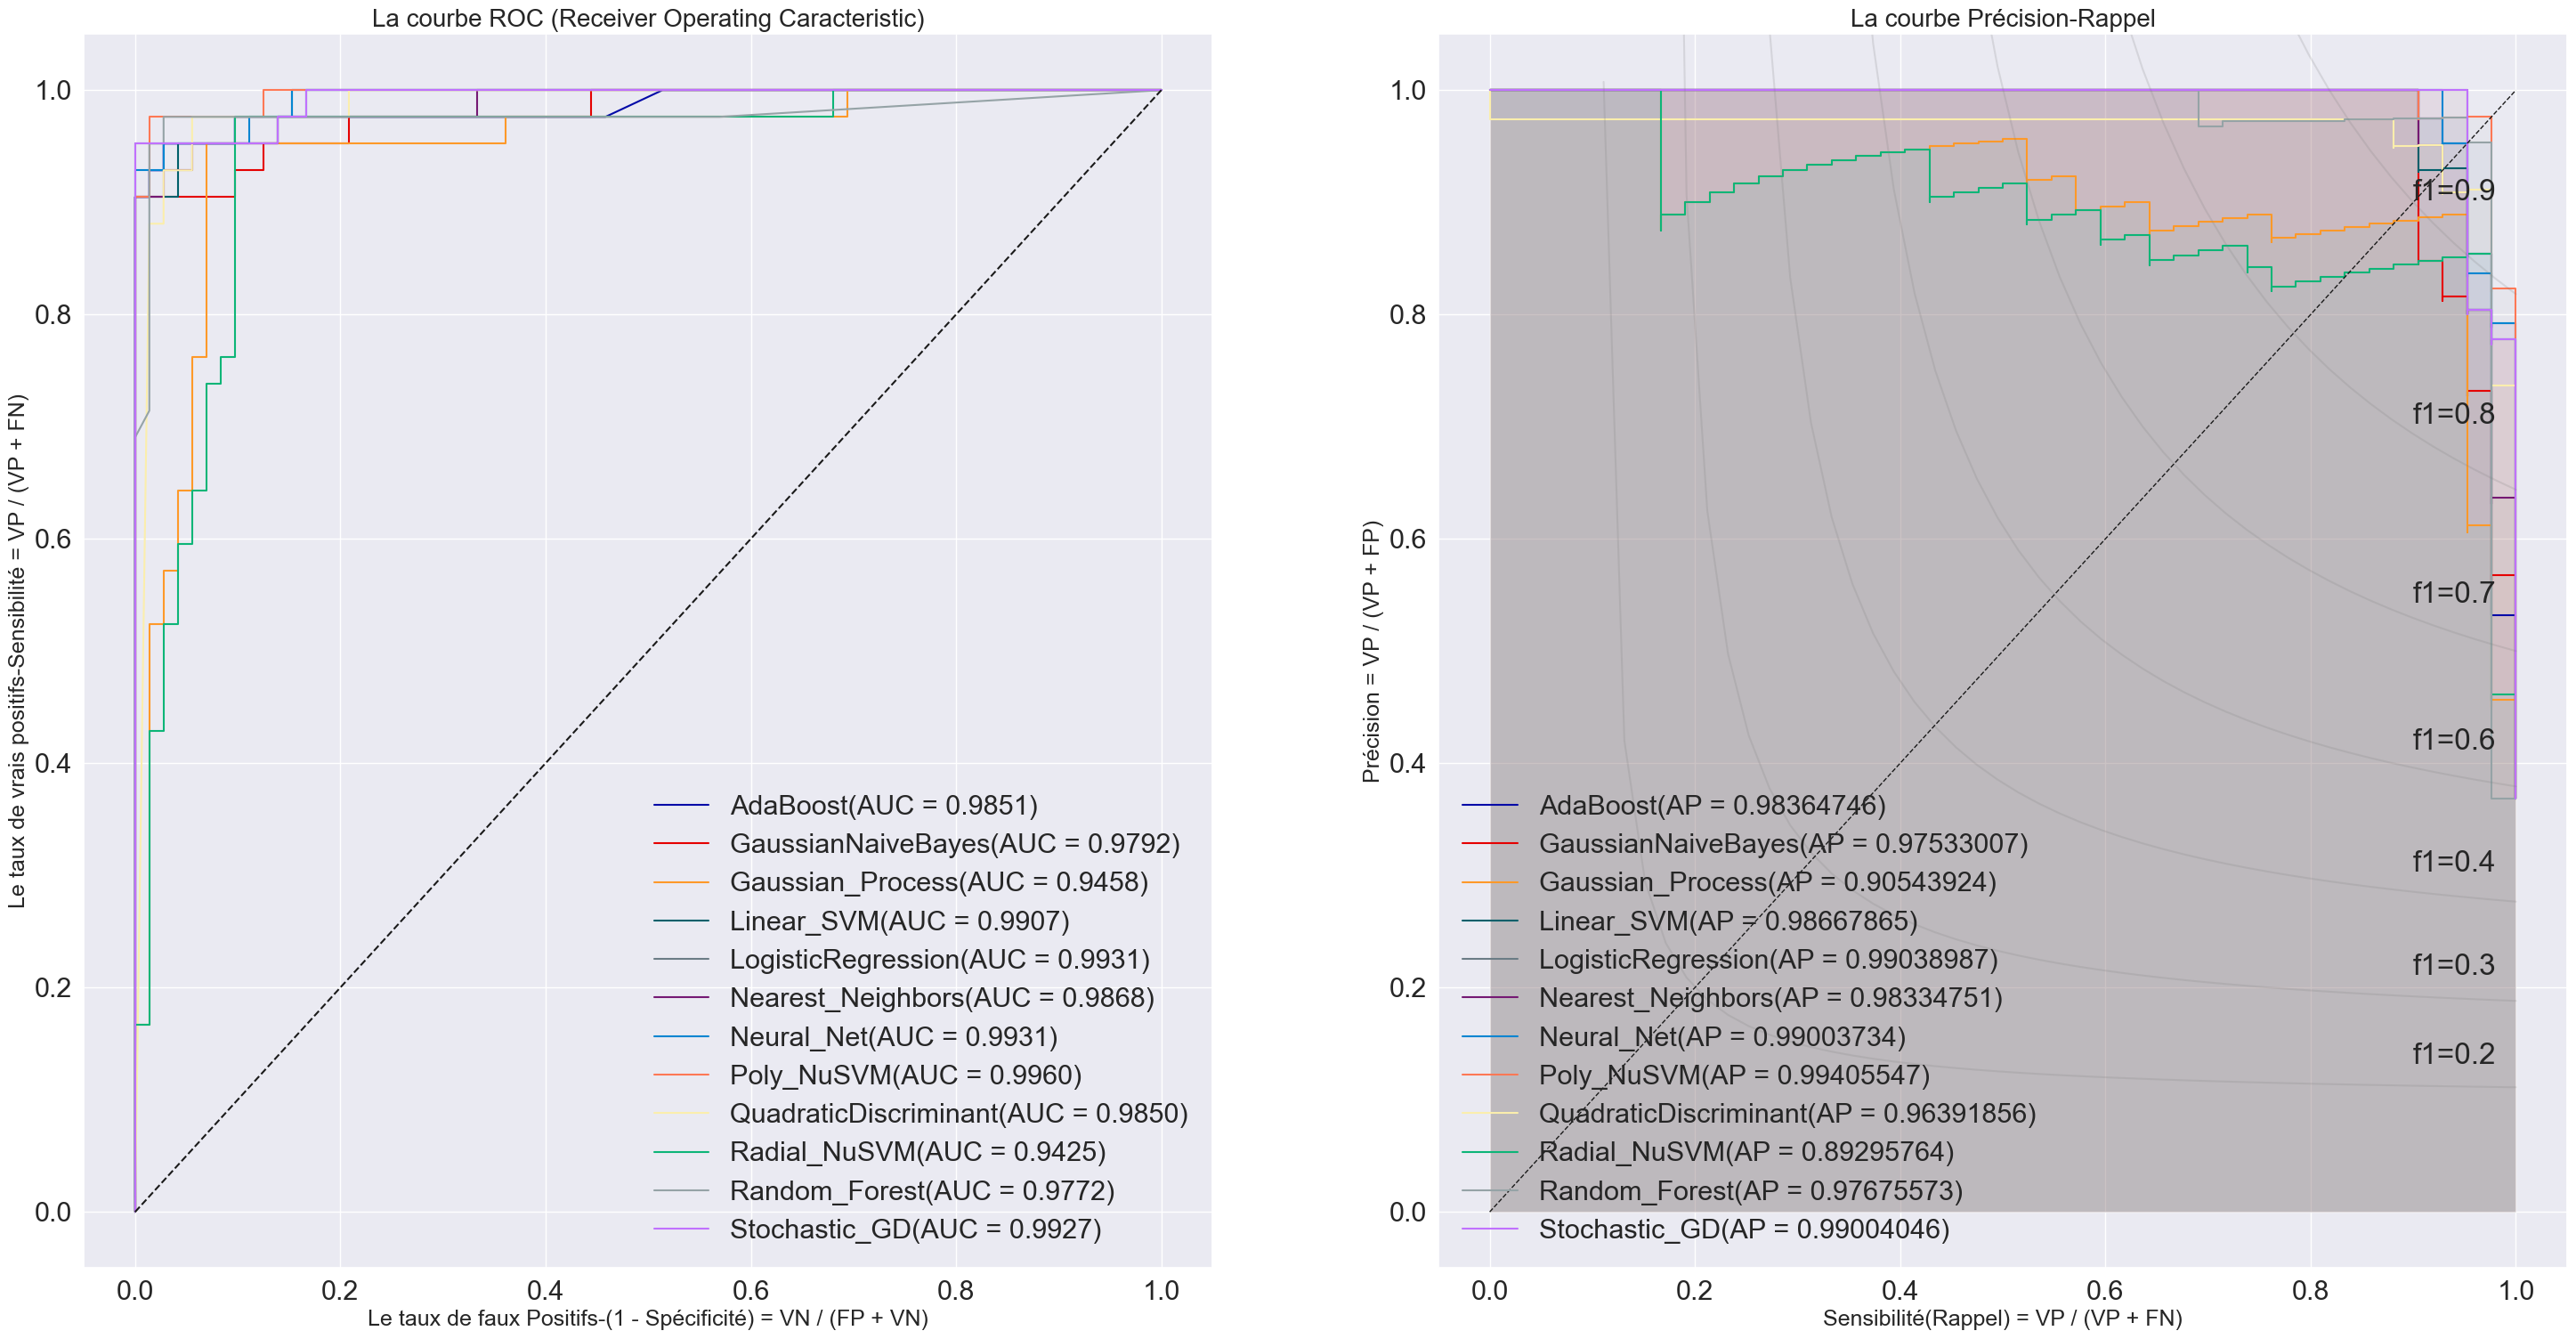

Exécution  :2.92s


In [188]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'STD', 
                                                     projet=projet)
resultats = pd.concat([resultats,resultatsTemp])

# Worst standard Scaler 

In [189]:
X_train, X_test = X.loc[('apprentissage'),:],\
X.loc[('test'),:]

In [190]:
modelStd = StandardScaler()
modelStd.fit(X_train)
X_train[X_train.columns] = modelStd.transform(X_train)
X_test[X_test.columns] = modelStd.transform(X_test)


AdaBoost               0.9474	--	Area under the ROC curve : 0.9906	--	Exécution  :.04s
GaussianNaiveBayes     0.9211	--	Area under the ROC curve : 0.9808	--	Exécution  :.02s
Gaussian_Process       0.9386	--	Area under the ROC curve : 0.9759	--	Exécution  :.07s
Linear_SVM             0.9474	--	Area under the ROC curve : 0.9960	--	Exécution  :.03s
LogisticRegression     0.9474	--	Area under the ROC curve : 0.9947	--	Exécution  :.98s
Nearest_Neighbors      0.9474	--	Area under the ROC curve : 0.9815	--	Exécution  :.08s
Neural_Net             0.9474	--	Area under the ROC curve : 0.9944	--	Exécution  :.26s
Poly_NuSVM             0.9298	--	Area under the ROC curve : 0.9868	--	Exécution  :.02s
QuadraticDiscriminant  0.9474	--	Area under the ROC curve : 0.9833	--	Exécution  :.01s
Radial_NuSVM           0.9211	--	Area under the ROC curve : 0.9798	--	Exécution  :.04s
Random_Forest          0.9474	--	Area under the ROC curve : 0.9775	--	Exécution  :.11s
Stochastic_GD          0.9474	--	Area under

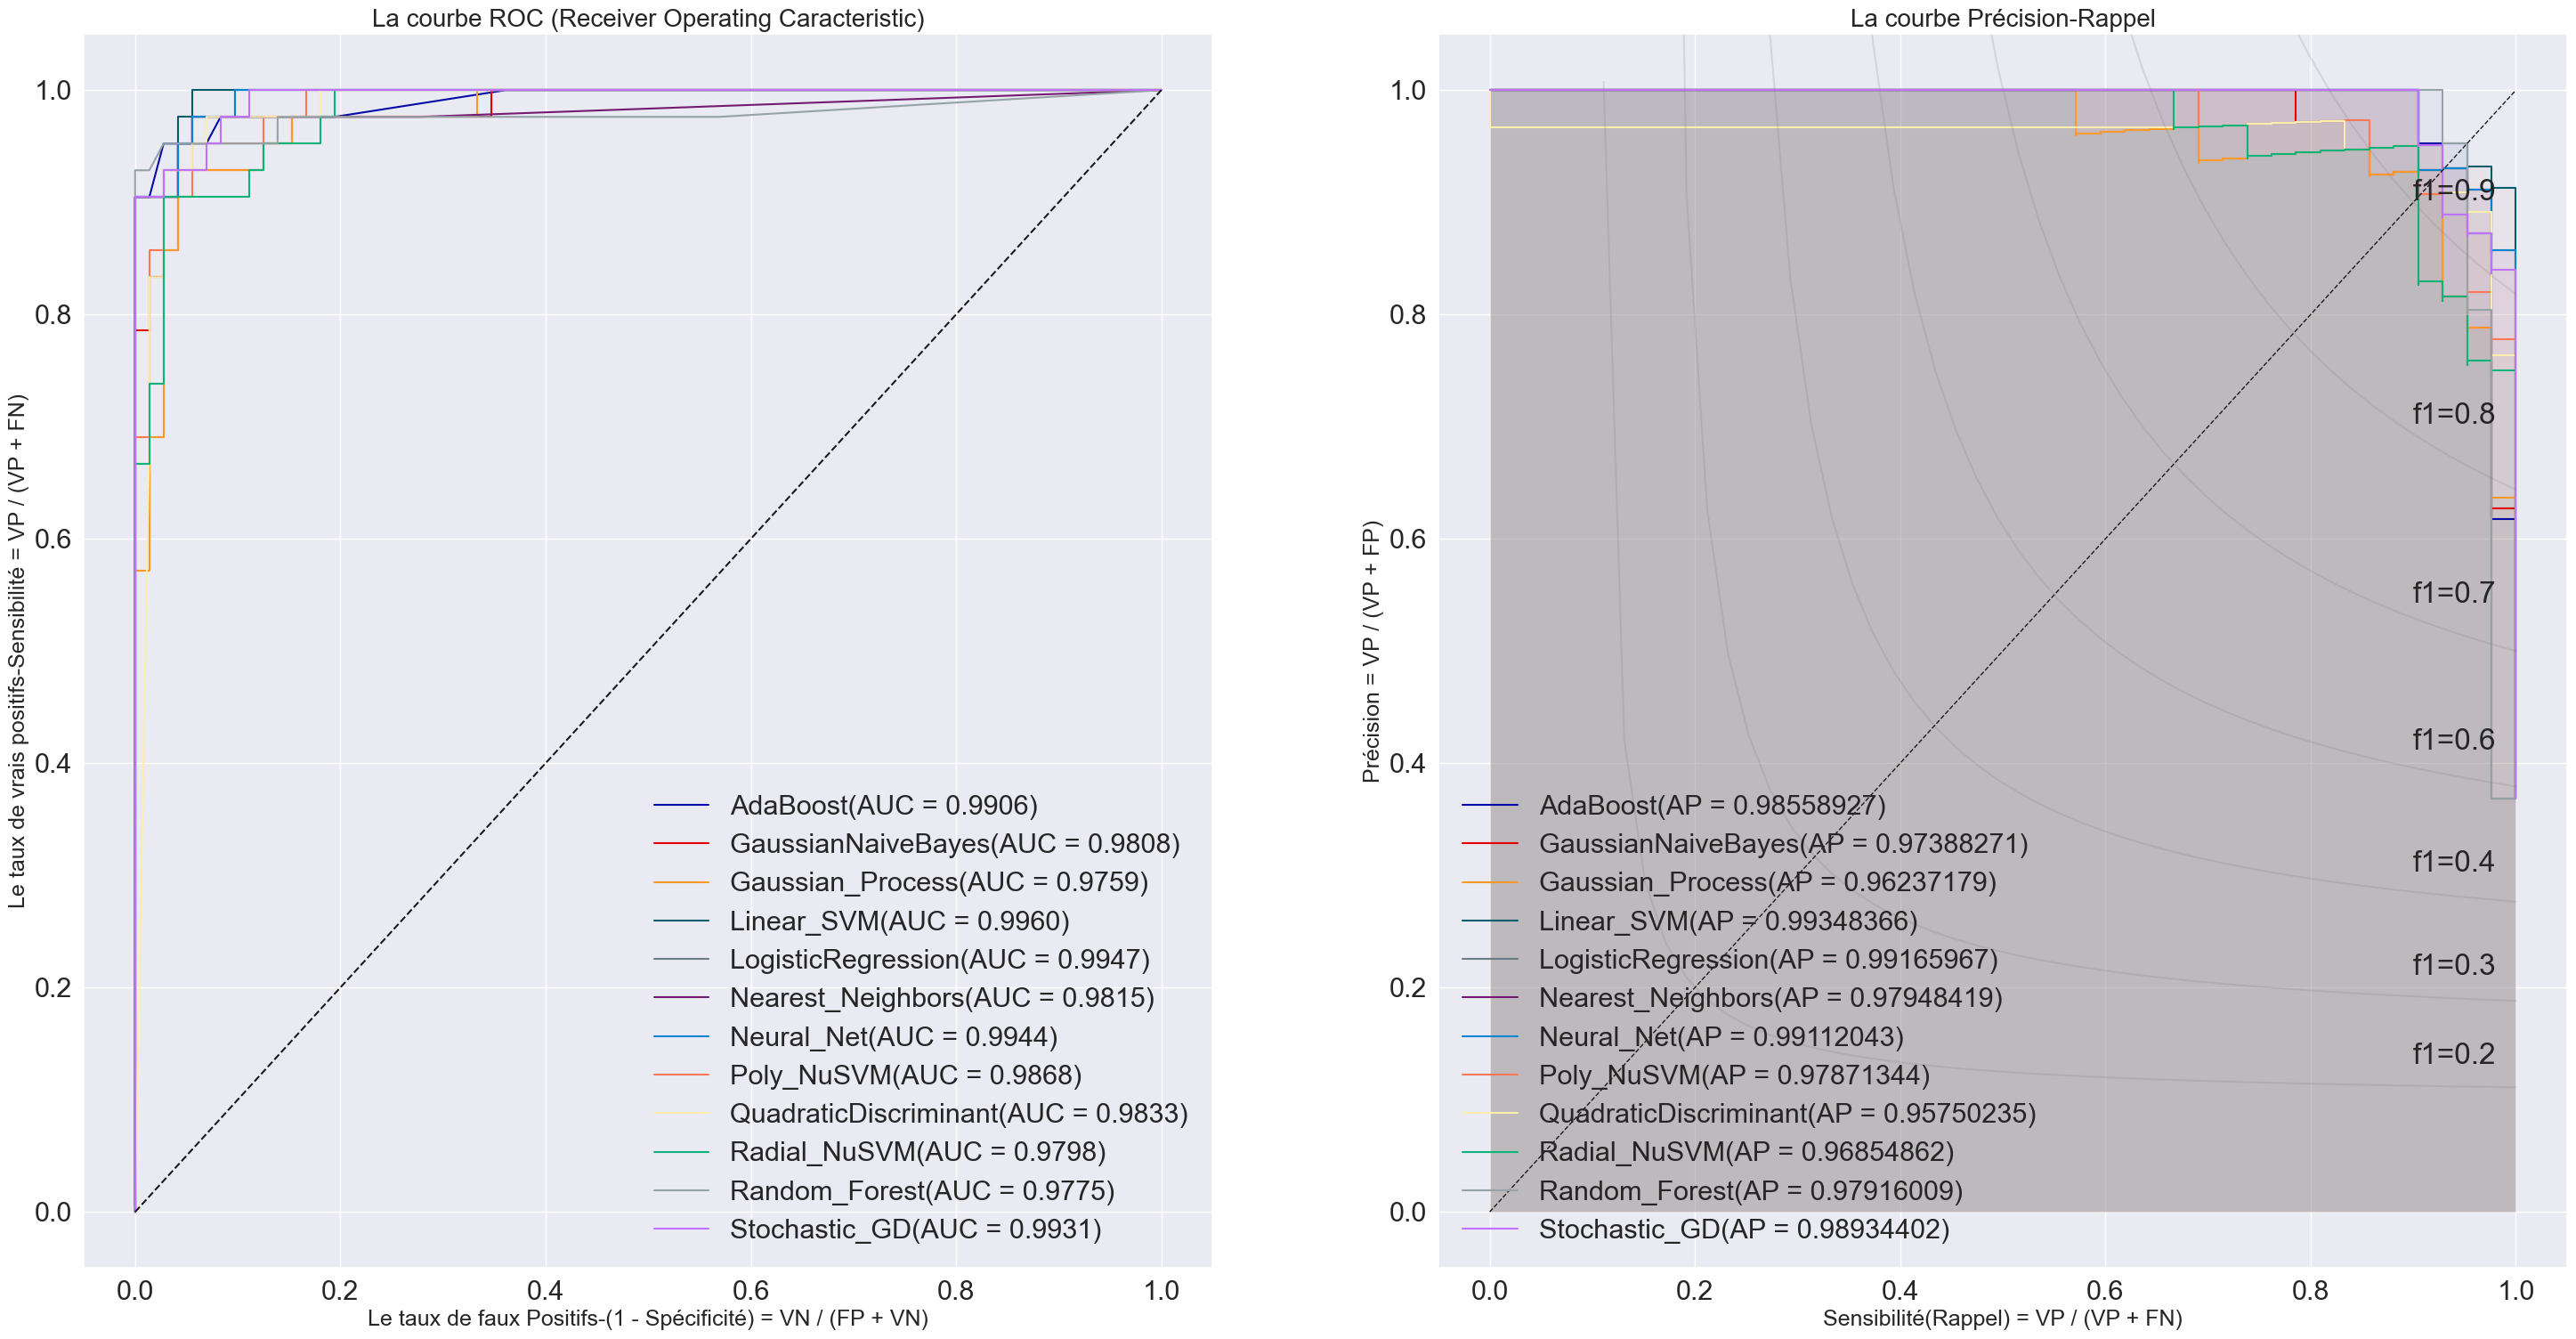

Exécution  :2.74s


In [191]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train = X_train.filter(regex='(worst)$', axis=1), 
                                                     y_train = y_train,
                                                     X_test = X_test.filter(regex='(worst)$', axis=1), 
                                                     y_test = y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'STD (worst)', 
                                                     projet=projet)
resultats = pd.concat([resultats,resultatsTemp])

# Mean standard scaler

In [192]:
X_train, X_test = X.loc[('apprentissage'),:],\
X.loc[('test'),:]

In [193]:
modelStd = StandardScaler()
modelStd.fit(X_train)
X_train[X_train.columns] = modelStd.transform(X_train)
X_test[X_test.columns] = modelStd.transform(X_test)

AdaBoost               0.9386	--	Area under the ROC curve : 0.9926	--	Exécution  :.04s
GaussianNaiveBayes     0.9211	--	Area under the ROC curve : 0.9726	--	Exécution  :.02s
Gaussian_Process       0.9211	--	Area under the ROC curve : 0.9686	--	Exécution  :.07s
Linear_SVM             0.9386	--	Area under the ROC curve : 0.9828	--	Exécution  :.03s
LogisticRegression     0.9386	--	Area under the ROC curve : 0.9818	--	Exécution  :.93s
Nearest_Neighbors      0.9123	--	Area under the ROC curve : 0.9812	--	Exécution  :.08s
Neural_Net             0.9211	--	Area under the ROC curve : 0.9841	--	Exécution  :.23s
Poly_NuSVM             0.8860	--	Area under the ROC curve : 0.9712	--	Exécution  :.03s
QuadraticDiscriminant  0.9211	--	Area under the ROC curve : 0.9835	--	Exécution  :.01s
Radial_NuSVM           0.9123	--	Area under the ROC curve : 0.9755	--	Exécution  :.04s
Random_Forest          0.9211	--	Area under the ROC curve : 0.9901	--	Exécution  :.11s
Stochastic_GD          0.9298	--	Area under

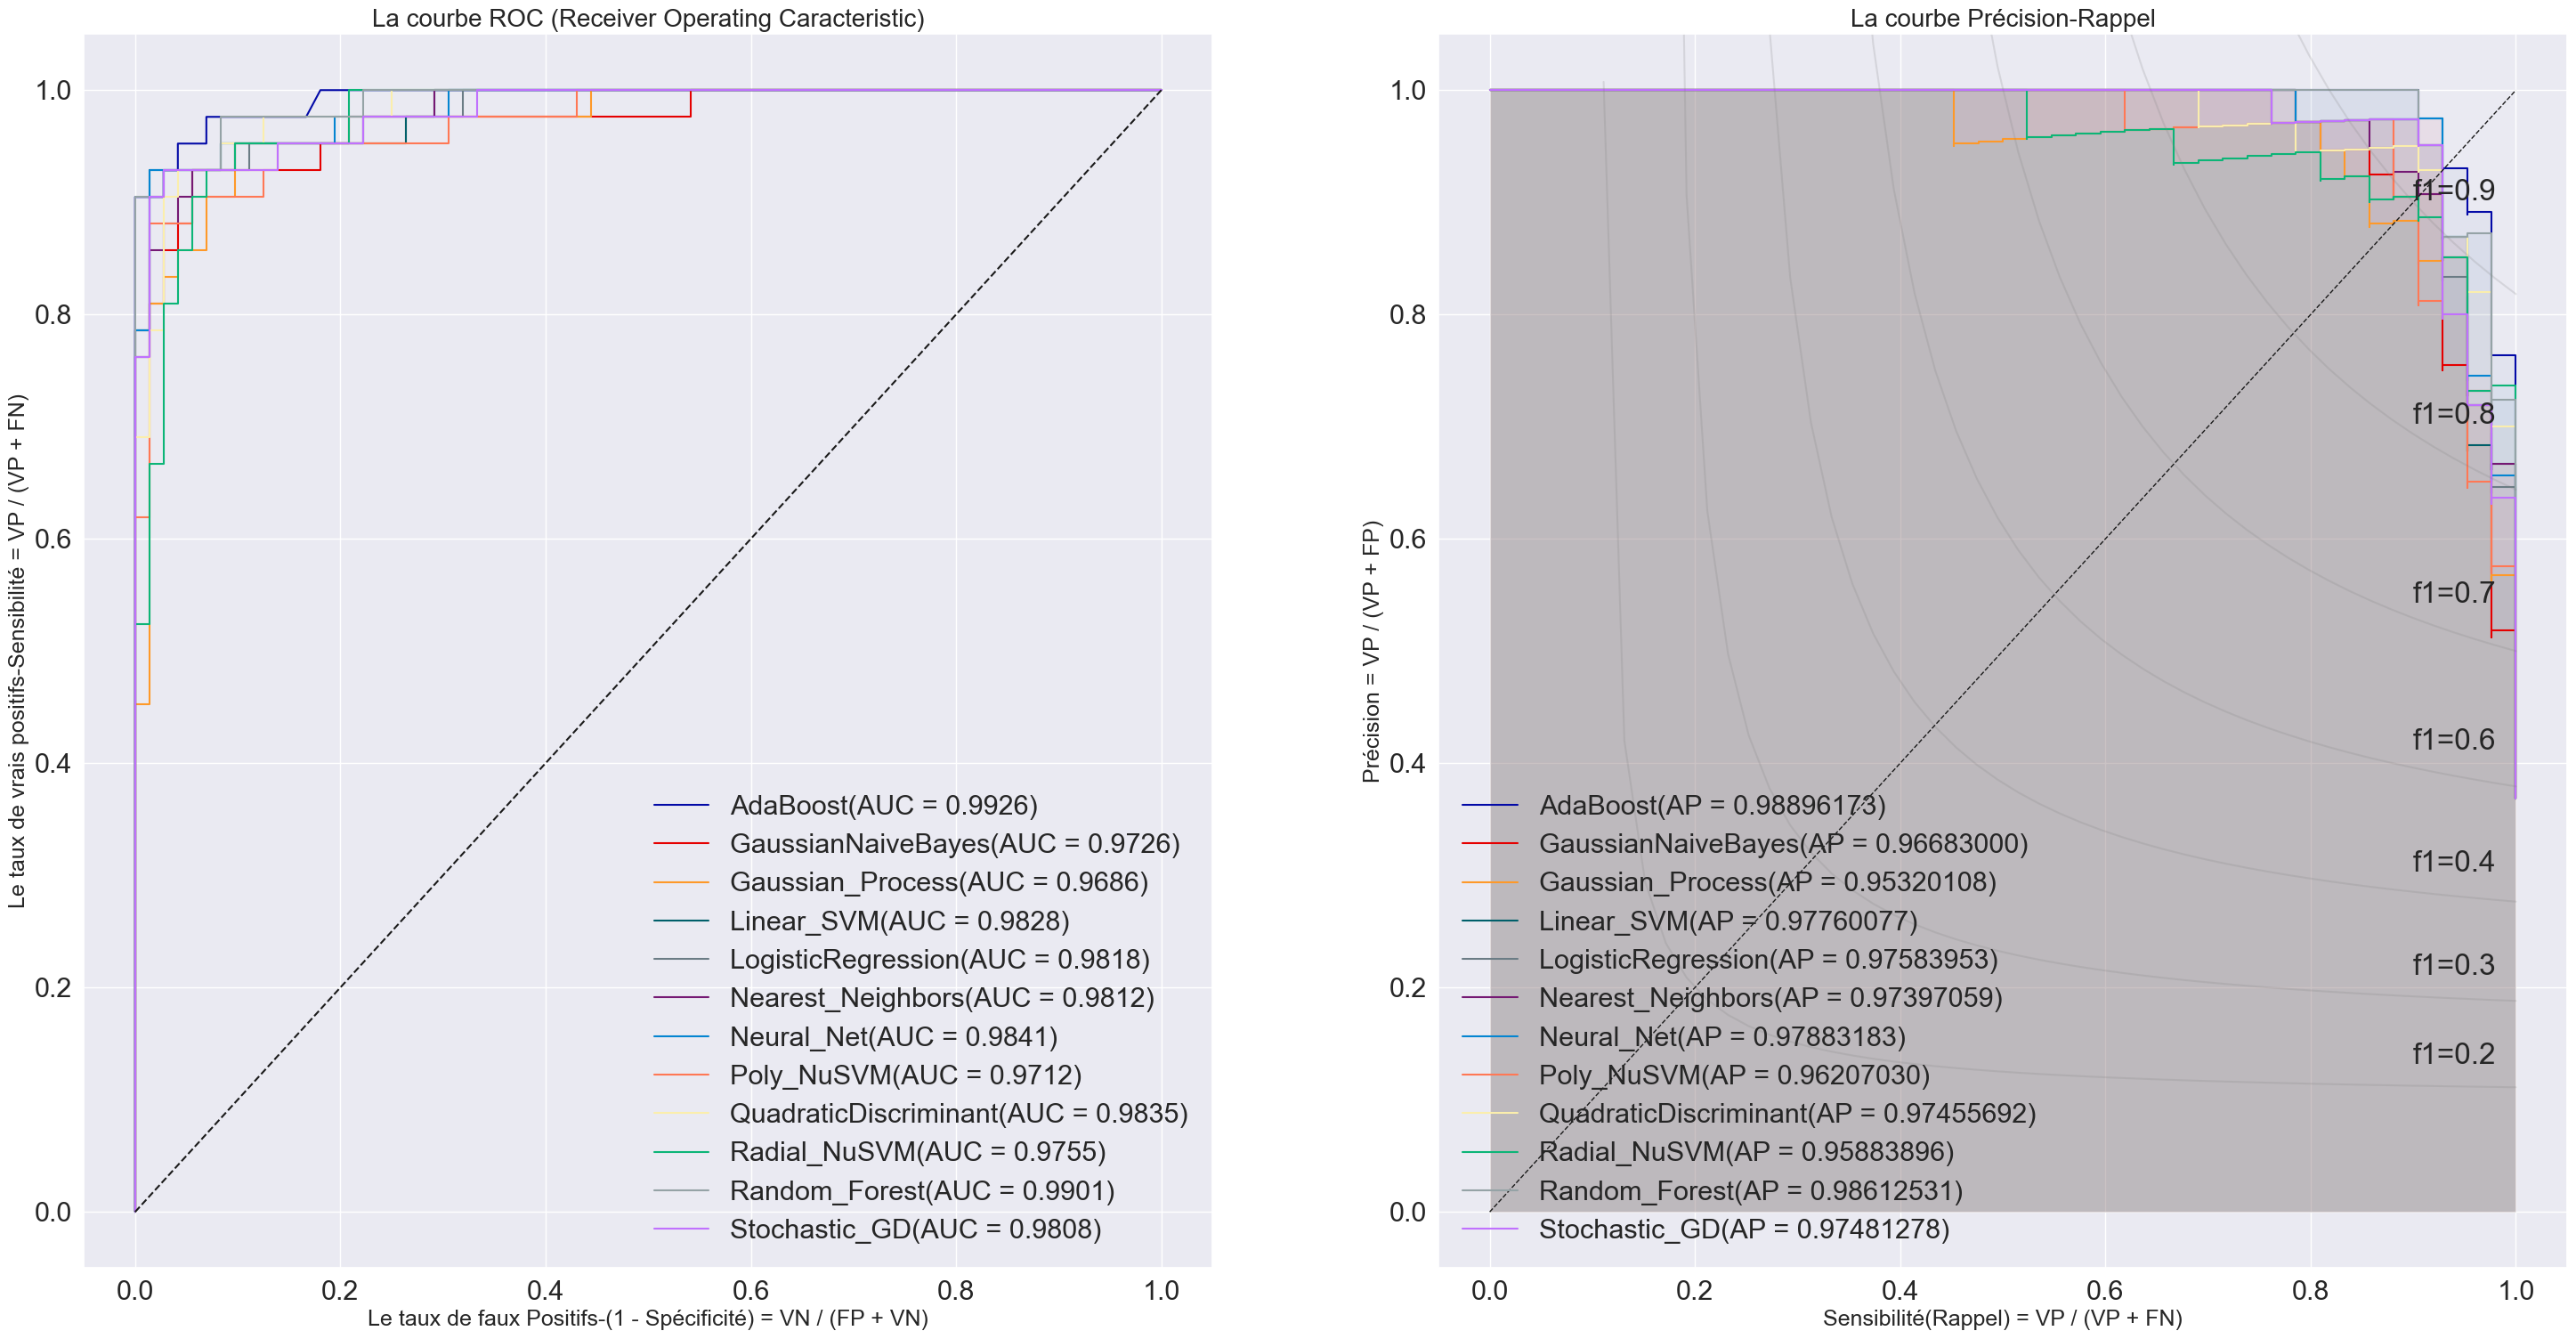

Exécution  :2.67s


In [194]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train = X_train.filter(regex='(mean)$', axis=1), 
                                                     y_train = y_train,
                                                     X_test = X_test.filter(regex='(mean)$', axis=1), 
                                                     y_test = y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'STD (mean)', 
                                                     projet=projet)
resultats = pd.concat([resultats,resultatsTemp])

# SE standard réduit

In [195]:
X_train, X_test = X.loc[('apprentissage'),:],\
X.loc[('test'),:]

In [196]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [197]:
modelStd = StandardScaler()
modelStd.fit(X_train)
X_train[X_train.columns] = modelStd.transform(X_train)
X_test[X_test.columns] = modelStd.transform(X_test)

AdaBoost               0.8860	--	Area under the ROC curve : 0.9563	--	Exécution  :.04s
GaussianNaiveBayes     0.8684	--	Area under the ROC curve : 0.9193	--	Exécution  :.01s
Gaussian_Process       0.8333	--	Area under the ROC curve : 0.9077	--	Exécution  :.06s
Linear_SVM             0.9035	--	Area under the ROC curve : 0.9722	--	Exécution  :.05s
LogisticRegression     0.8772	--	Area under the ROC curve : 0.9527	--	Exécution  :.95s
Nearest_Neighbors      0.8421	--	Area under the ROC curve : 0.9398	--	Exécution  :.08s
Neural_Net             0.8596	--	Area under the ROC curve : 0.9484	--	Exécution  :.22s
Poly_NuSVM             0.8333	--	Area under the ROC curve : 0.9087	--	Exécution  :.05s
QuadraticDiscriminant  0.8596	--	Area under the ROC curve : 0.9530	--	Exécution  :.01s
Radial_NuSVM           0.8246	--	Area under the ROC curve : 0.9001	--	Exécution  :.05s
Random_Forest          0.8947	--	Area under the ROC curve : 0.9497	--	Exécution  :.10s
Stochastic_GD          0.8772	--	Area under

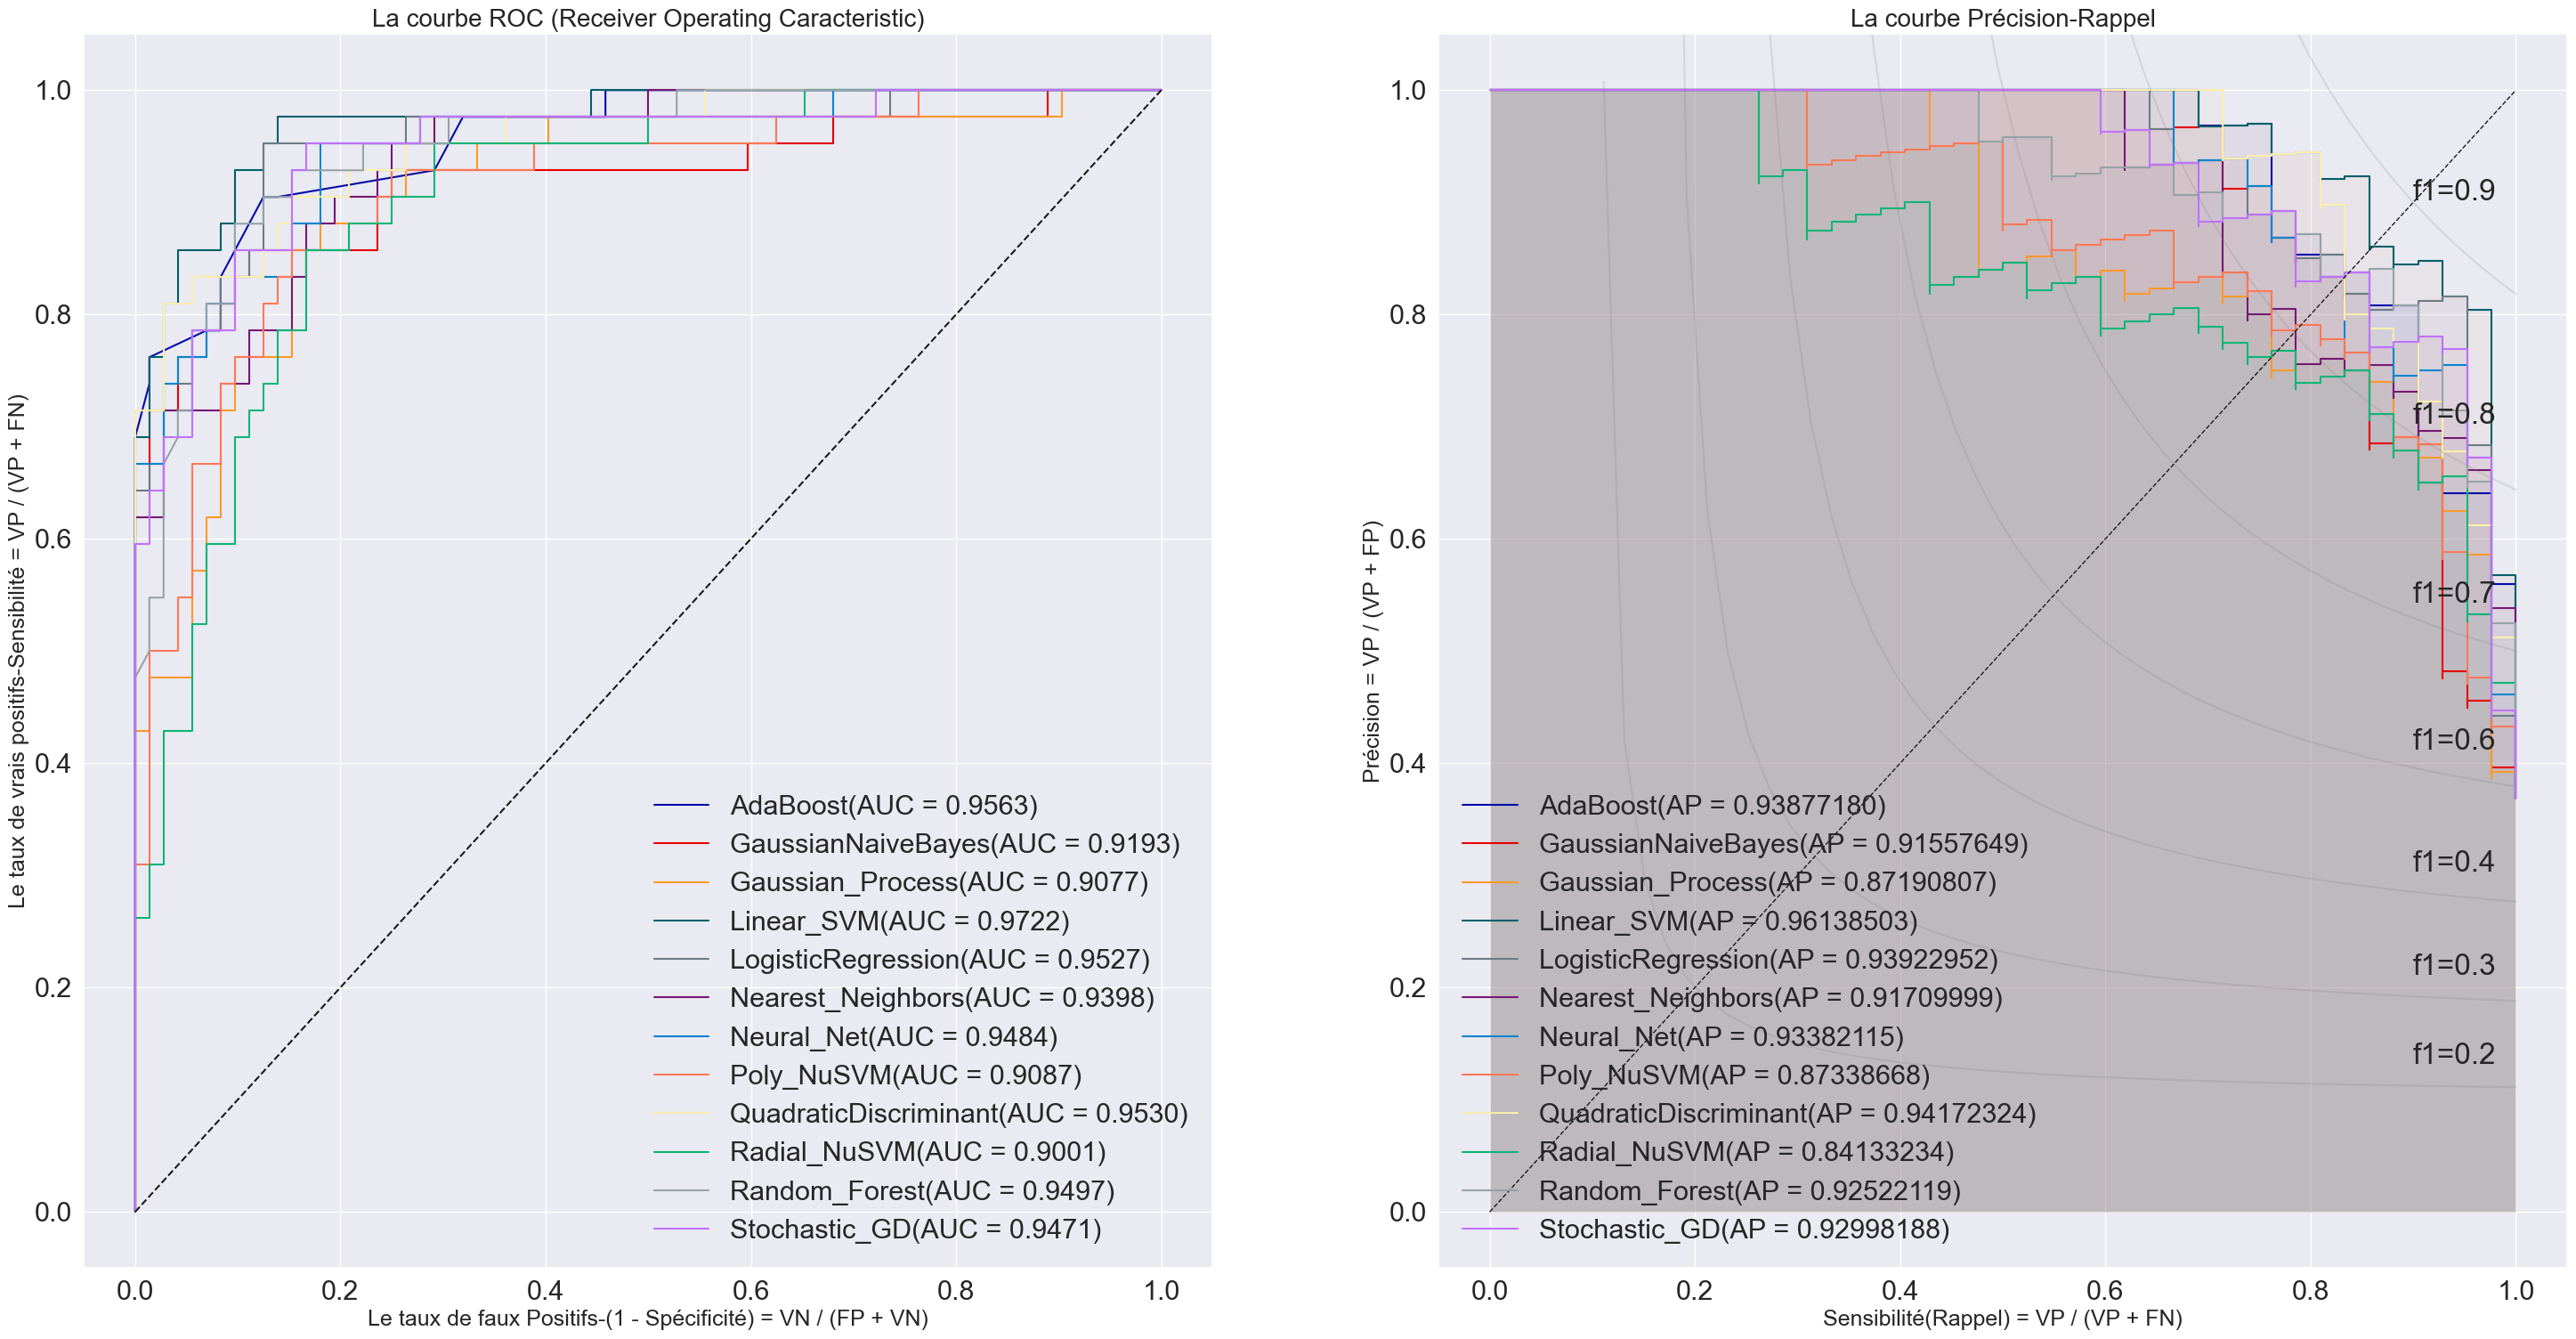

Exécution  :2.67s


In [198]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train = X_train.filter(regex='(se)$', axis=1), 
                                                     y_train = y_train,
                                                     X_test = X_test.filter(regex='(se)$', axis=1), 
                                                     y_test = y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'STD (SE)', 
                                                     projet=projet)
resultats = pd.concat([resultats,resultatsTemp])

# PCA & standard scaler on worst 

In [199]:
X_train, X_test = X.loc[('apprentissage'),:],\
X.loc[('test'),:]

In [200]:
modelStd = StandardScaler()
modelStd.fit(X_train)
X_train[X_train.columns] = modelStd.transform(X_train)
X_test[X_test.columns] = modelStd.transform(X_test)


In [201]:
X_train = X_train.filter(regex='(worst)$', axis=1)
X_test = X_test.filter(regex='(worst)$', axis=1)

In [202]:
modelPCA = PCA(svd_solver='full')
modelPCA.fit(X_train)

PCA(svd_solver='full')

In [203]:
modelPCA.explained_variance_ratio_.cumsum()*100

array([ 57.7277244 ,  78.26412021,  86.36502518,  91.59497974,
        96.38292216,  98.28060908,  99.11148351,  99.80474233,
        99.95902106, 100.        ])

In [204]:
modelPCA.explained_variance_*100

array([5.78548780e+02, 2.05816302e+02, 8.11874837e+01, 5.24147428e+01,
       4.79848855e+01, 1.90186685e+01, 8.32704547e+00, 6.94785824e+00,
       1.54618548e+00, 4.10692035e-01])

In [205]:
modelPCA.n_components_
inertie = pd.DataFrame(modelPCA.explained_variance_ratio_,columns=['Inertie']) 
inertie['Label'] = np.round(modelPCA.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,len(modelPCA.explained_variance_)+1)
inertie['Inertie'] = np.round(inertie['Inertie']*100,2)
dim = modelPCA.n_components_
inertie = inertie[inertie['Dimension']<= dim]

## Choix du nombre de dimension 

In [206]:
sum(modelPCA.explained_variance_ratio_.cumsum()*100 <= 95) + 1

inertie[inertie.Dimension <= sum(modelPCA.explained_variance_ratio_.cumsum()*100 <= 95) + 1]

Inertie  Label  Dimension
0    57.73  57.73          1
1    20.54  78.26          2
2     8.10  86.37          3
3     5.23  91.59          4
4     4.79  96.38          5

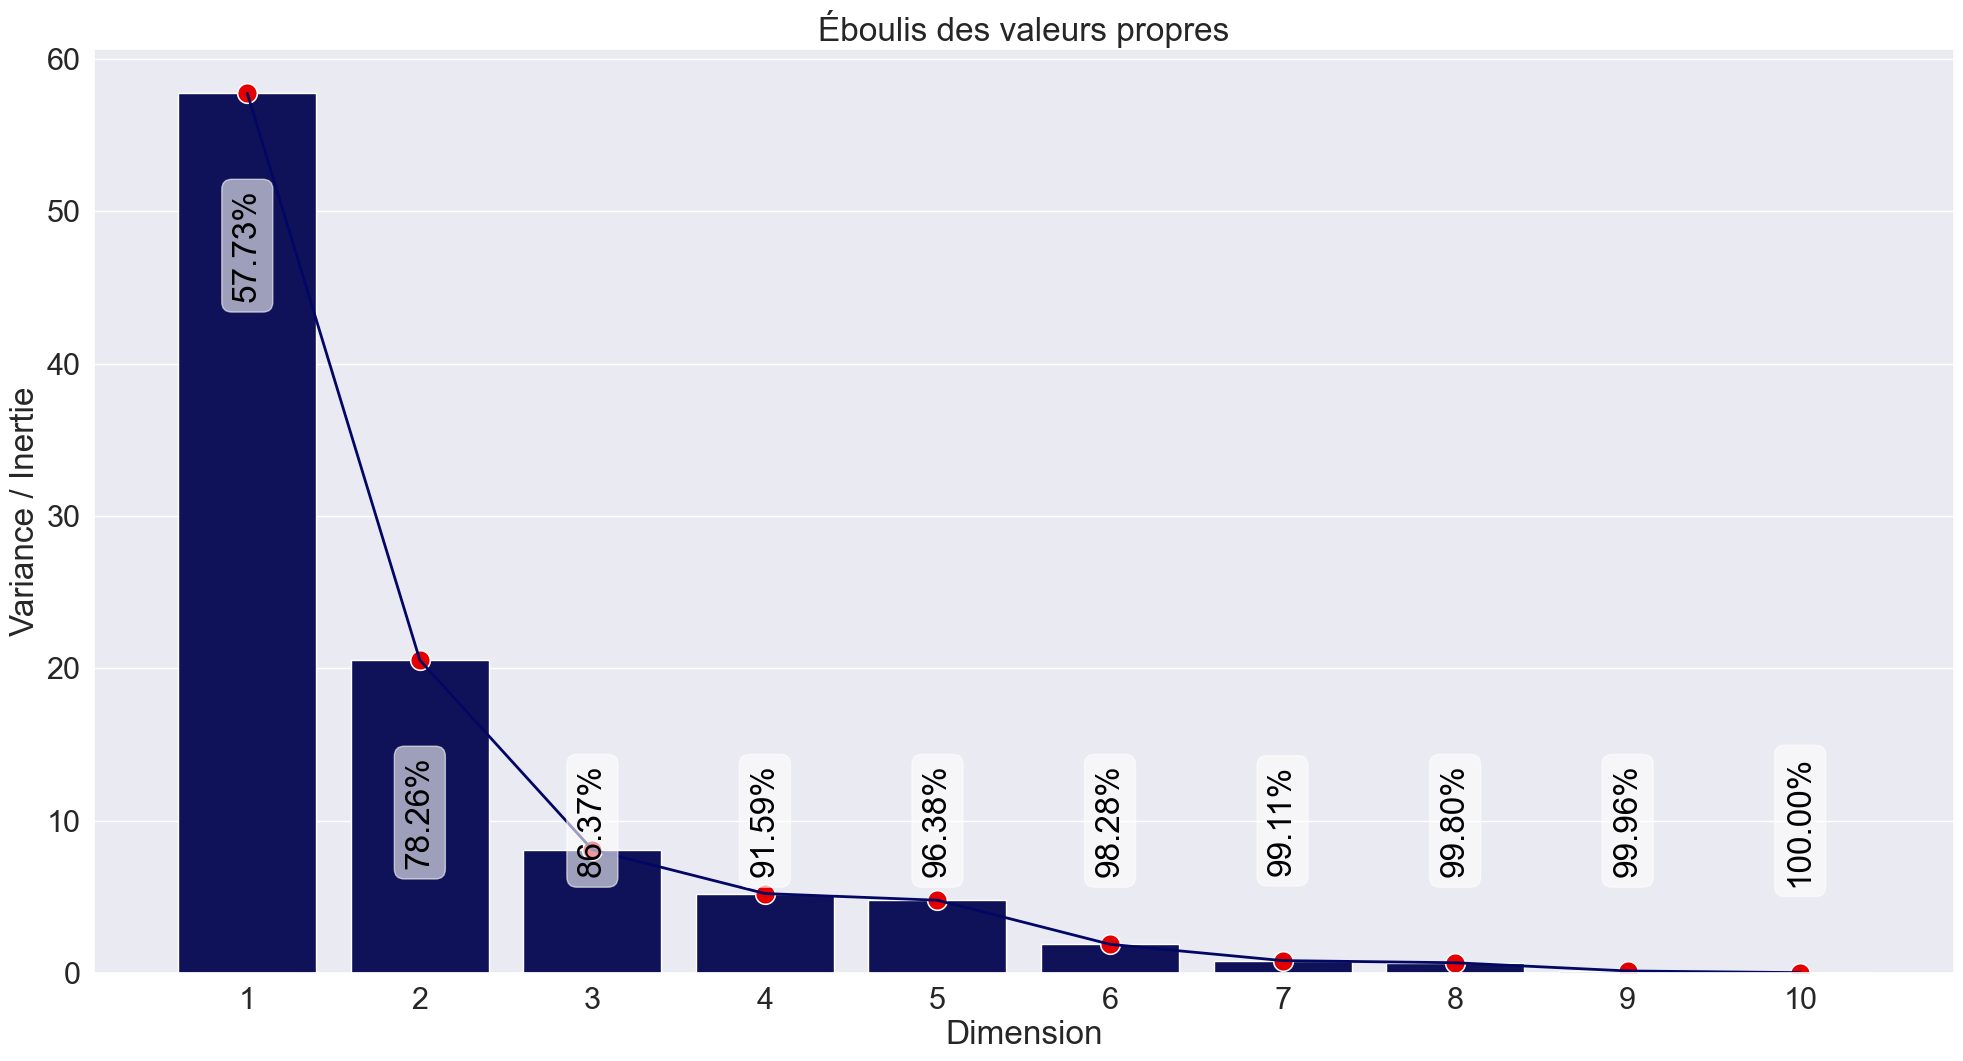

In [207]:
fig, ax = plt.subplots(figsize=(24,12));
graph = sns.barplot(x="Dimension",y='Inertie', data=inertie[inertie.Dimension <= 10], color="#030764", ax=ax)

for i,(nom,valeur) in enumerate(zip(inertie[inertie.Dimension <= 10].sort_values('Dimension').Label,inertie.sort_values('Dimension').Inertie)):
    # valeur = 0.1 if valeur - 0.1 < 0.1 else valeur - 0.1
    valeur = 10 if valeur - 10 < 10 else valeur - 10
    delta =  i 
    graph.text(
                delta ,
                valeur,
                f'{nom:0.2f}%',
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
    
graph = sns.lineplot( x=inertie[inertie.Dimension <= 10].Dimension - 1,
                      y='Inertie',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764",
                      ax    = ax);

sns.scatterplot(x=inertie[inertie.Dimension <= 10].Dimension - 1,
                y     = 'Inertie',
                data  = inertie,
                s     = 200,
                # ci    = None, 
                color = "#e50000",
                ax    = ax);    
    
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance / Inertie')
ax.set_title('Éboulis des valeurs propres')

#sauvegarderImage('Choix du nombre des dimensions01--Temperatures')
sns.set(font_scale=2)

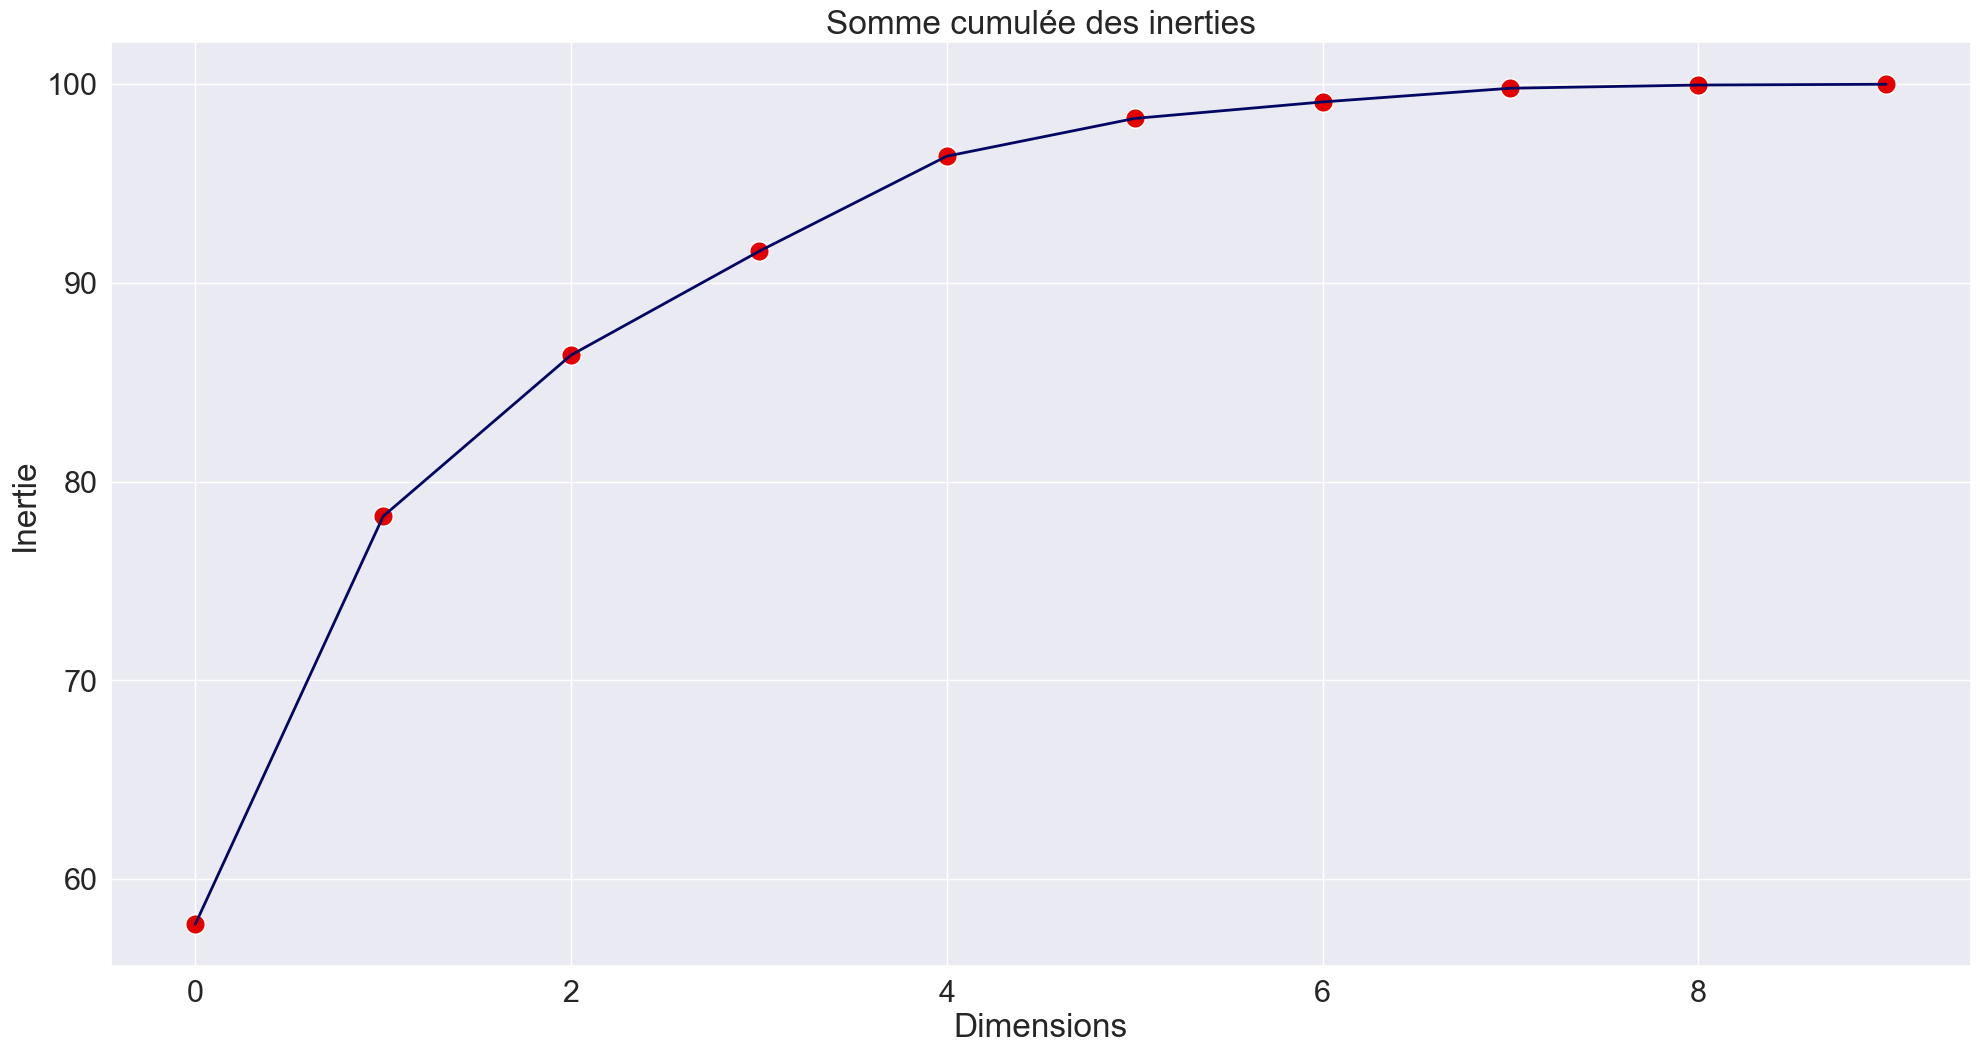

In [208]:
fig, ax = plt.subplots(figsize=(24,12));

sns.lineplot(x         = inertie[inertie.Dimension <= 10].Dimension-1,
             y         = 'Label',
             data      = inertie,
             estimator = None, 
             lw        = 2, 
             color     = "#030764",
             ax        = ax);
sns.scatterplot(x     = inertie[inertie.Dimension <= 10].Dimension-1,
                y     = 'Label',
                data  = inertie,
                s     = 200,
                color = "#e50000",
                ax    = ax);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');
ax.set_title('Somme cumulée des inerties');
#sauvegarderImage('Choix du nombre des dimensions02--Temperatures')

### Règle de kaiser

In [209]:
print(f'{100 / modelPCA.n_components_}')

10.0


In [210]:
inertie[inertie.Inertie >= (100 / modelPCA.n_components_)]

Inertie  Label  Dimension
0    57.73  57.73          1
1    20.54  78.26          2

In [211]:
n_components = 3 
modelPCA = PCA(n_components=n_components).set_output(transform="pandas")
donneesACP = modelPCA.fit_transform(X_train)
donneesACP.columns = [f'Dimension{i:02d}' for i in range(1,n_components+1)]

In [212]:
donneesACP.corr().style.format("{:0.1e}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

In [213]:
donneesACP

Dimension01  Dimension02  Dimension03
id       diagnosis                                       
842302   M             5.966279     0.561366    -2.512787
842517   M             1.812738    -2.350761    -0.868592
84300903 M             3.399103    -0.834752    -0.762438
84348301 M             6.324345     6.841981    -0.801616
843786   M             2.757656     3.038090    -0.766505
...                         ...          ...          ...
926424   M             2.282994    -2.970680    -0.553152
926682   M             1.573102    -2.836262     1.634412
926954   M             0.650025    -1.346650     1.208582
927241   M             7.342749     0.908905     0.911691
92751    B            -3.433230     0.141929     1.517749

[455 rows x 3 columns]

In [214]:
X_test
modelPCA.transform(X_test)

pca0      pca1      pca2
id       diagnosis                              
84358402 M          1.149814 -1.906505 -1.851233
844359   M          2.276118 -1.367992 -0.229234
844981   M          3.059541  2.583269  0.318457
846381   M         -0.617931 -1.121512  0.405617
851509   M          3.577405 -3.528244  0.743507
...                      ...       ...       ...
922840   B         -1.348882  1.562498 -0.319011
923169   B         -2.531356  0.463058  0.494442
923748   B         -3.317990 -0.438823  0.521161
925277   B         -0.455192 -0.534781  0.358386
925311   B         -3.429496 -1.339311  2.724439

[114 rows x 3 columns]

In [215]:

X_text = modelPCA.transform(X_test).rename(columns={f'pca{i}':f'Dimension{i+1:02d}' for i in range(0,n_components)})


AdaBoost               0.9386	--	Area under the ROC curve : 0.9851	--	Exécution  :.04s
GaussianNaiveBayes     0.9123	--	Area under the ROC curve : 0.9643	--	Exécution  :.02s
Gaussian_Process       0.9474	--	Area under the ROC curve : 0.9812	--	Exécution  :.07s
Linear_SVM             0.9649	--	Area under the ROC curve : 0.9950	--	Exécution  :.02s
LogisticRegression     0.9649	--	Area under the ROC curve : 0.9947	--	Exécution  :.93s
Nearest_Neighbors      0.9474	--	Area under the ROC curve : 0.9891	--	Exécution  :.08s
Neural_Net             0.9649	--	Area under the ROC curve : 0.9947	--	Exécution  :.17s
Poly_NuSVM             0.9561	--	Area under the ROC curve : 0.9848	--	Exécution  :.03s
QuadraticDiscriminant  0.9386	--	Area under the ROC curve : 0.9874	--	Exécution  :.01s
Radial_NuSVM           0.9561	--	Area under the ROC curve : 0.9825	--	Exécution  :.03s
Random_Forest          0.9474	--	Area under the ROC curve : 0.9792	--	Exécution  :.11s
Stochastic_GD          0.9649	--	Area under

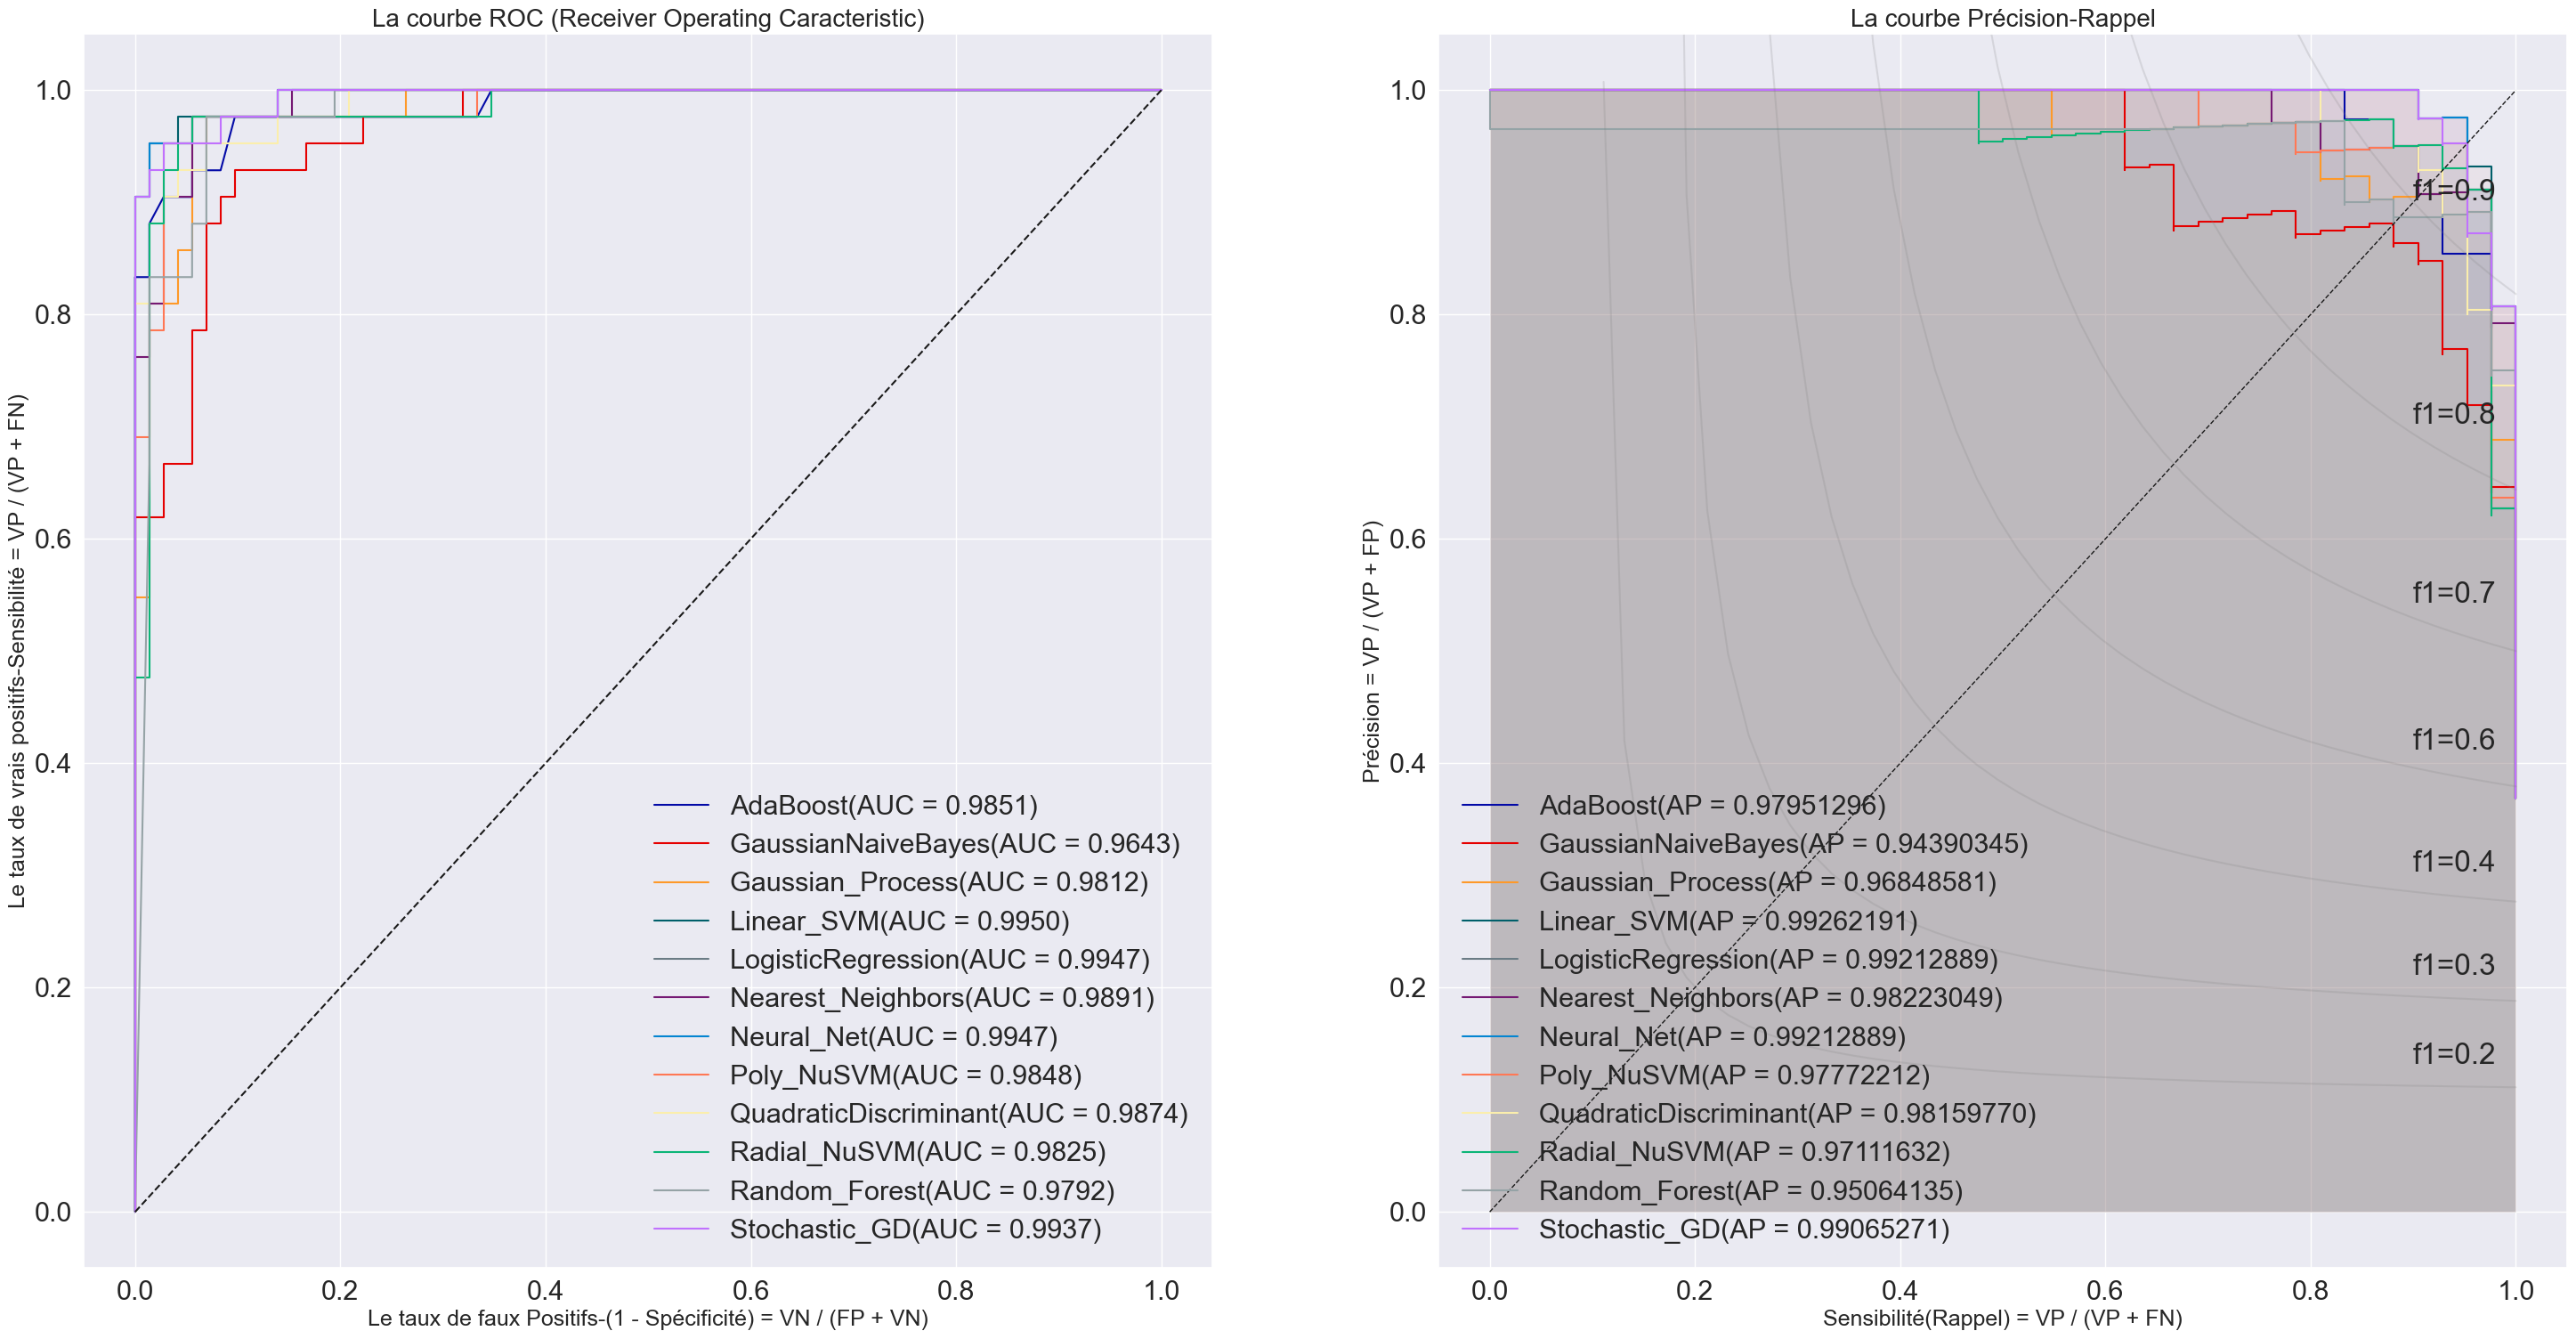

Exécution  :2.60s


In [216]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train = donneesACP, 
                                                     y_train = y_train,
                                                     X_test =  X_text, 
                                                     y_test = y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'ACP STD (Worst)', 
                                                     projet=projet)
resultats = pd.concat([resultats,resultatsTemp])

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Affichage des évolutions des métriques dans les essais</div></b> 

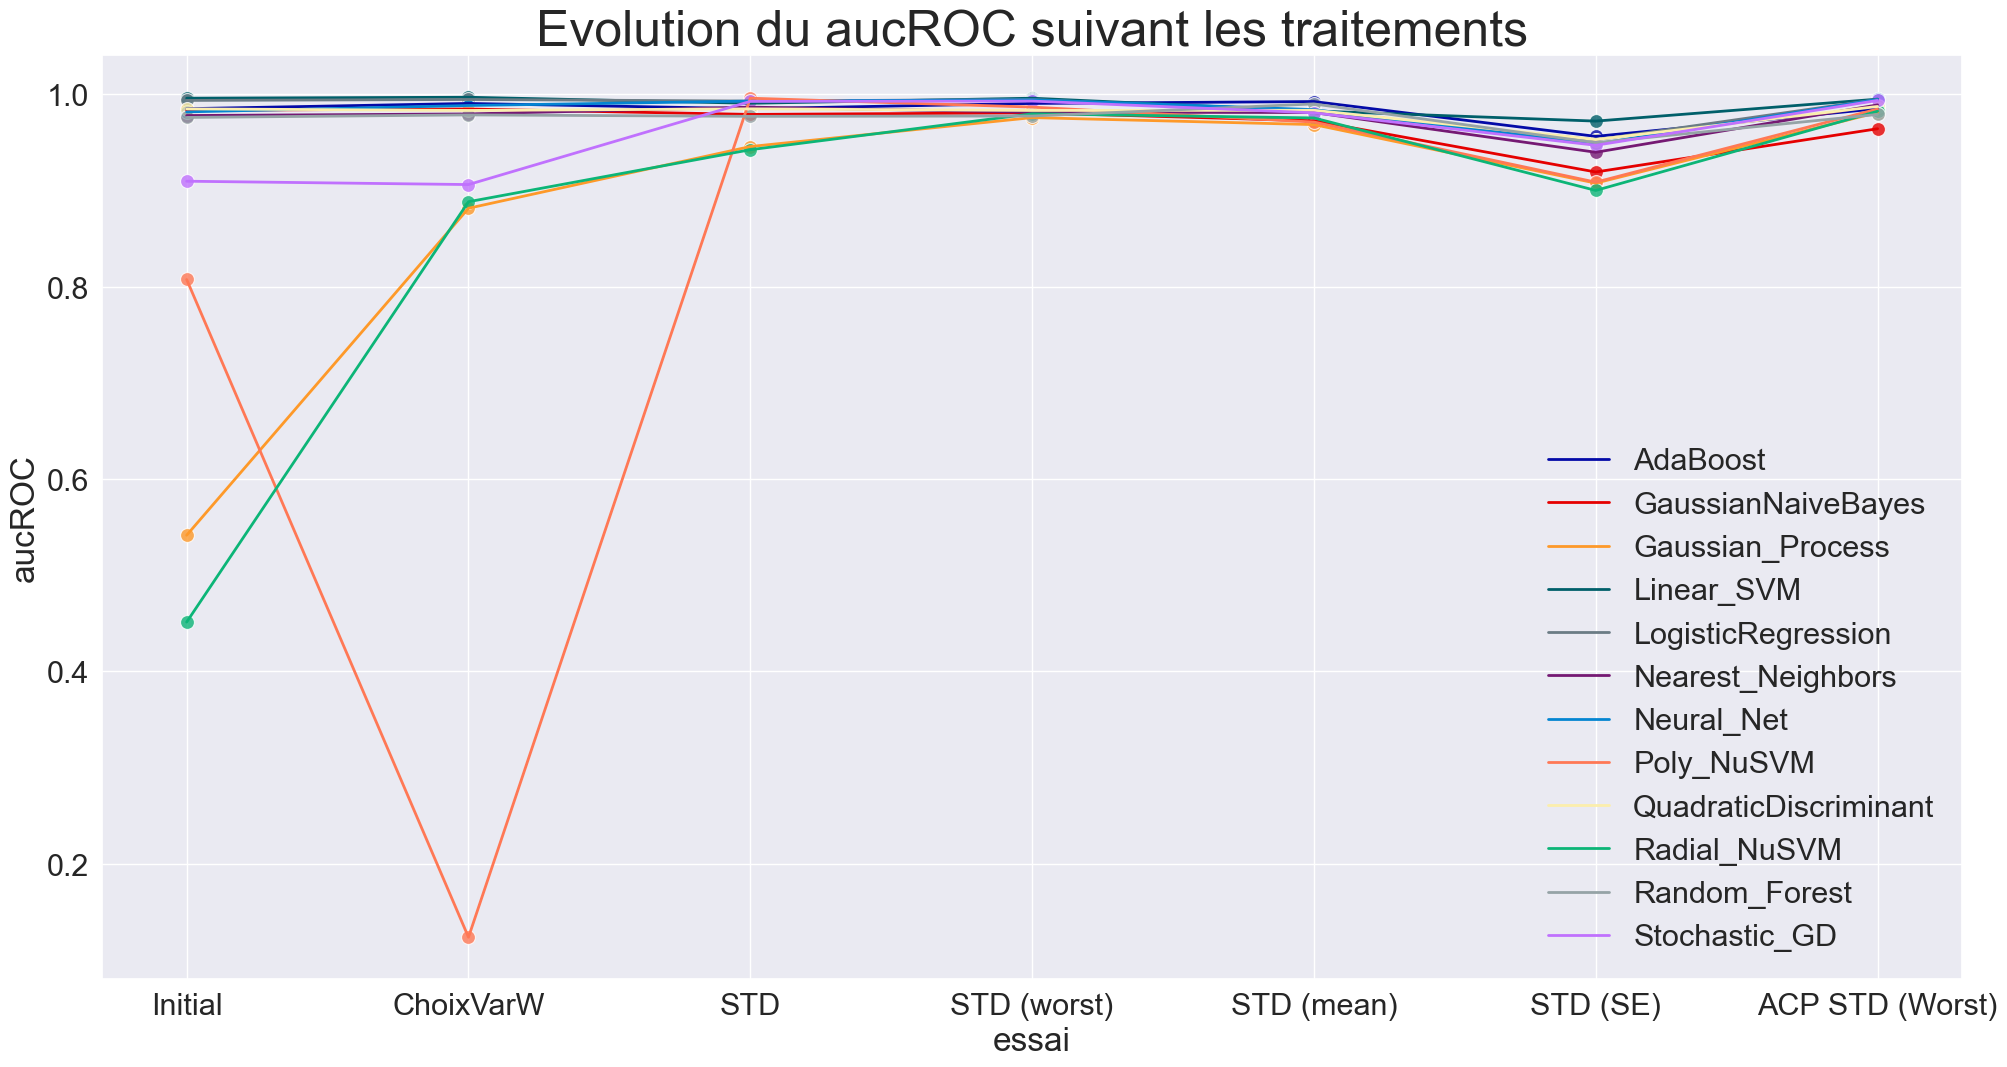

In [217]:
affichageEvolutionMetriques(resultats, metrique='aucROC', palette=palette)